In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [4]:
logging.getLogger().setLevel(logging.CRITICAL)

from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

In [5]:
jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

In [13]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'N1s' : 0.477, 'Br3p' : 1.054, 'Br3d' : 1.054,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl2p' : 0.891, 'Si2p': 0.339})

In [49]:
def plot_xp_regions(experiments : list, regions : list, ncols: int = 3):
    """Subplots all regions of a list of experiments (unnormalised)"""
    rows = int(np.ceil(len(regions) / ncols))

    fig, ax = plt.subplots(rows, ncols, figsize=(16, 8))
    for i,r in enumerate(regions):
            for c,xp in enumerate(experiments):
                j, k = i//ncols, i%ncols
                if i == len(regions) - 1:   # Set labels from last region
                    lb = xp.name
                else:
                    lb='__nolabel__'
                
                try:
                    li = plot_region(xp, r, ax=ax[j][k], lb=lb)
                except KeyError:
                    pass
                
                ax[j][k].set_title(r)
                leg = ax[j][k].get_legend()
                if leg is not None: leg.remove()
                cosmetics_plot(ax=ax[j][k], leg = False);
                
            if len(experiments)%2 == 0:
                ax[j][k].invert_xaxis()
    fig.legend(loc='upper right', bbox_to_anchor=(1.12, 0.5), fontsize=16)
    plt.tight_layout()

# Analysis experiments on DDEA on ITO O3, plasma
1- Preparation by Zoraida in Valencia (Oct 2020)

## Read processed experiments

In [37]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/**/*.xy'

files = glob.glob(path, recursive=True)
files.sort()

files_new = ['/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201106_ITO_as_received.xy',
            '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/proc/20200131_ITO_DEA_acid_10min_sublim.xy',
            '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/cookie_dip/20200211_ITO_DEA_acid_naoh_buoh/proc/20200211_ITO_DEA_acid_naoh_buoh.xy']

for f in files:
    if '/proc' in f:
        files_new.append(f)
        
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201106_ITO_as_received.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/proc/20200131_ITO_DEA_acid_10min_sublim.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/cookie_dip/20200211_ITO_DEA_acid_naoh_buoh/proc/20200211_ITO_DEA_acid_naoh_buoh.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201028_ITO_DEA_ZTF593_Aire_3.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201029_ITO_DEA_ZTF593_ON2.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201103_ITO_DEA_ZTF593_PN2.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201105_ITO_DEA_ZTF593_PA1.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201105_ITO_DEA_ZTF593_PN1.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201106_ITO_DEA_ZTF593_OA2.xy']

In [38]:
ddeas = []
colors = ['brown', 'b', 'g', 'r', 'c', 'y', 'magenta', 'k', 'lime']
for f, c in zip(files, colors):
    ls = 'solid'
    if '_Aire' in f:
        ls = '-.'
    if '_O' in f: 
        ls = 'dashed'
    print(f)
# for f in files:
    ddeas.append(read_processed_xp(f, color=c, ls=ls))

/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201106_ITO_as_received.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/proc/20200131_ITO_DEA_acid_10min_sublim.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/cookie_dip/20200211_ITO_DEA_acid_naoh_buoh/proc/20200211_ITO_DEA_acid_naoh_buoh.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201028_ITO_DEA_ZTF593_Aire_3.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201029_ITO_DEA_ZTF593_ON2.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201103_ITO_DEA_ZTF593_PN2.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201105_ITO_DEA_ZTF593_PA1.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201105_ITO_DEA_ZTF593_PN1.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/DDEA/proc/20201106_ITO_DEA_ZTF593_OA2.xy


In [39]:
ddeas[2].name = 'Cookie_PA1'

## Show individual plots

In [310]:
proc_exps[0].dfx.columns

MultiIndex(levels=[['Br3p', 'C1s', 'In3d', 'N1s', 'O1s', 'Sn3d', 'overview'], ['counts', 'energy']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
           names=['range', 'properties'])

In [12]:
regions = ddeas[0].dfx.columns.levels[0].values
regions= ['O1s', 'Sn3d', 'In3d', 'N1s', 'C1s', 'Br3p']

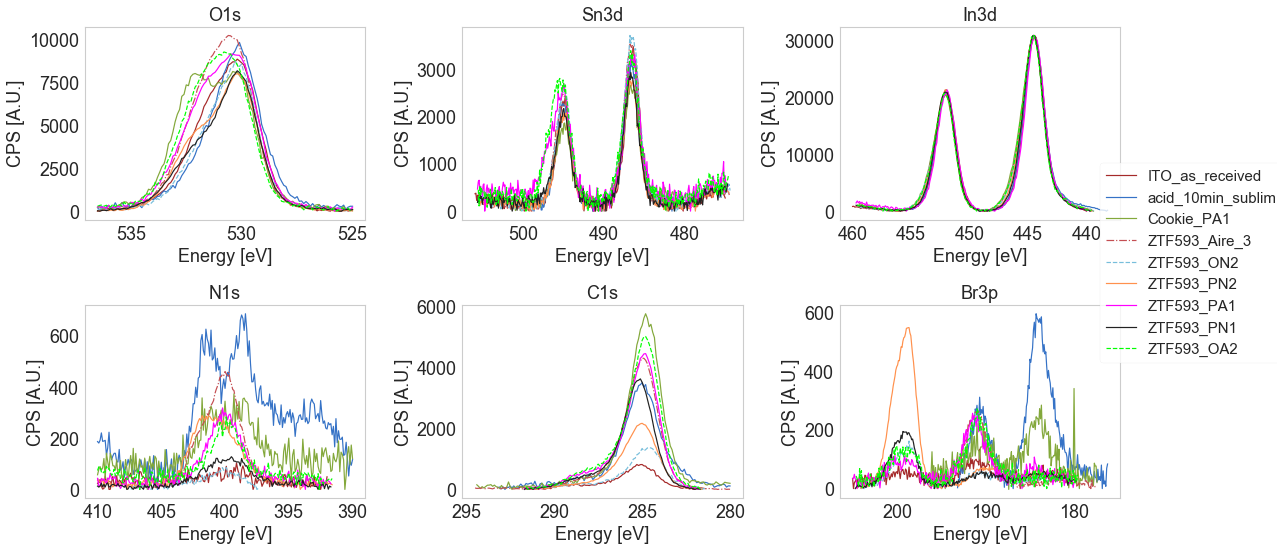

In [168]:
plot_xp_regions(ddeas, regions, ncols=3)

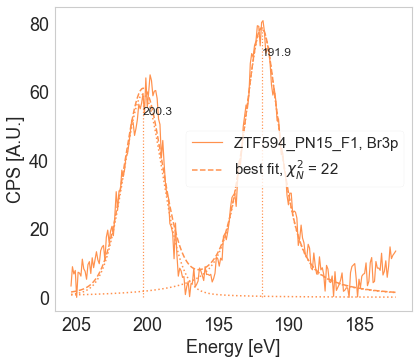

In [106]:
fit_double_voigt(ddeas[4], region='Br3p');

## Group by plasma/ozone:

In [165]:
ozexp, plexp = [], []
for xp in ddeas:
    if '_O' in xp.name:
        ozexp.append(xp)
    else:
        plexp.append(xp)
[xp.name for xp in ozexp]

['ZTF593_ON2', 'ZTF593_OA2']

In [27]:
regions= ['O1s', 'Sn3d', 'In3d', 'N1s', 'C1s', 'Br3p']

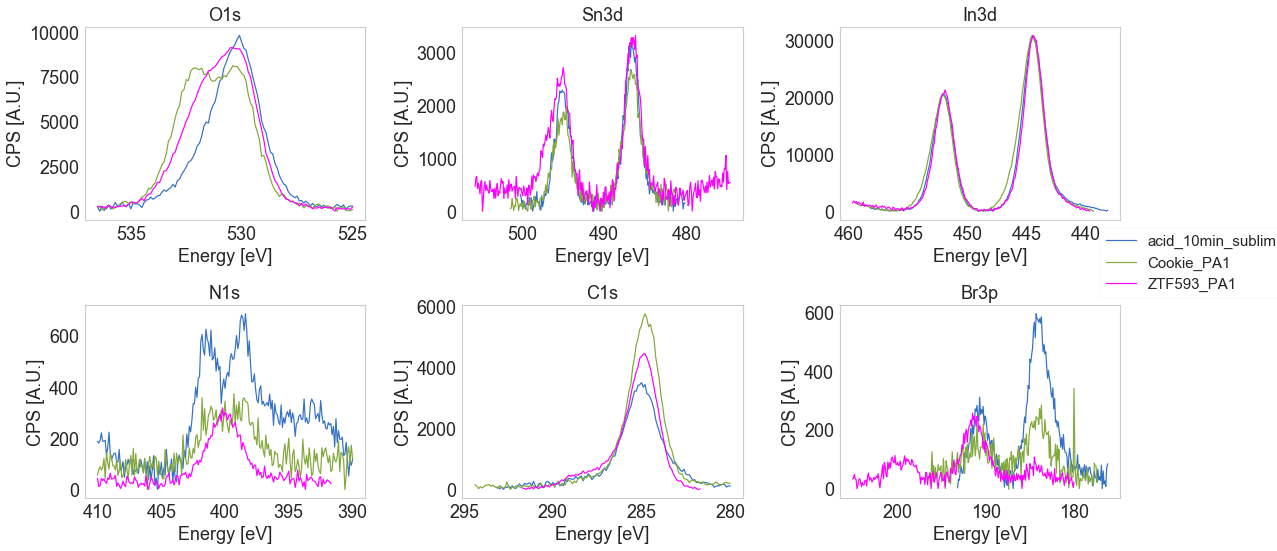

In [171]:
plot_xp_regions(plexp[1:3]+[plexp[5]], regions, ncols=3)

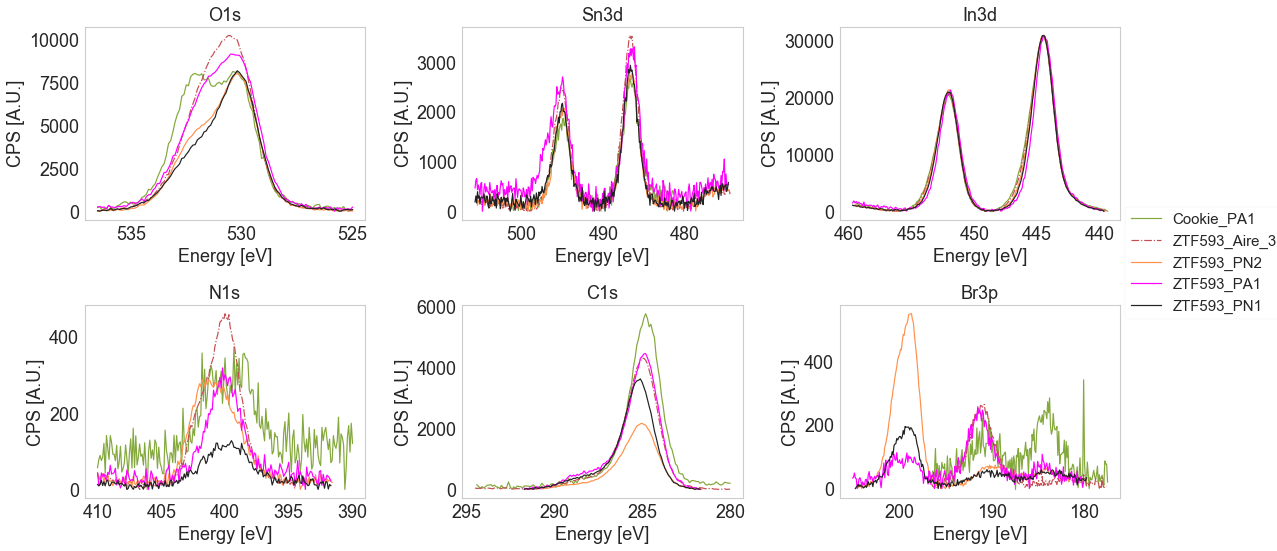

In [172]:
plot_xp_regions(plexp[2:], regions, ncols=3)

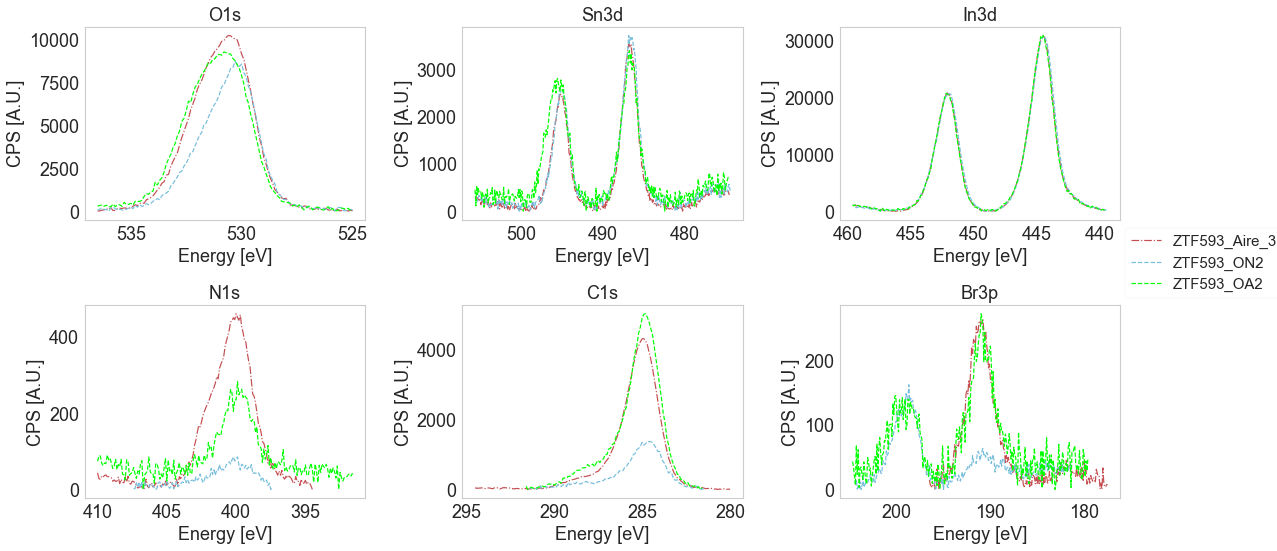

In [173]:
plot_xp_regions([plexp[3]] + ozexp, regions, ncols=3)

## Compare individual regions

### O 1s

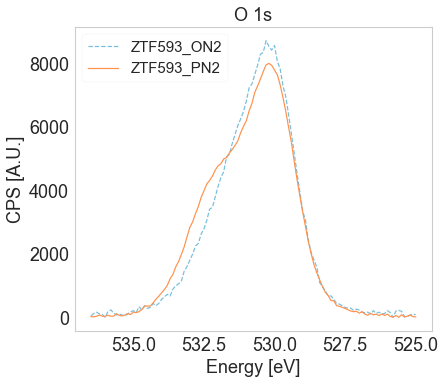

In [179]:
region = 'O1s'
plot_region(ozexp[0], region)
plot_region(plexp[4], region)
cosmetics_plot()
plt.title('O 1s')

plt.gca().lines

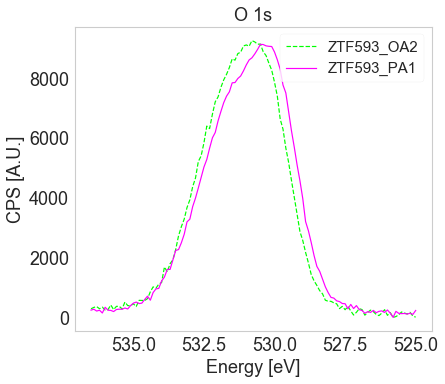

In [180]:
region = 'O1s'
plot_region(ozexp[1], region)
plot_region(plexp[5], region)
cosmetics_plot()
plt.title('O 1s')

plt.gca().lines

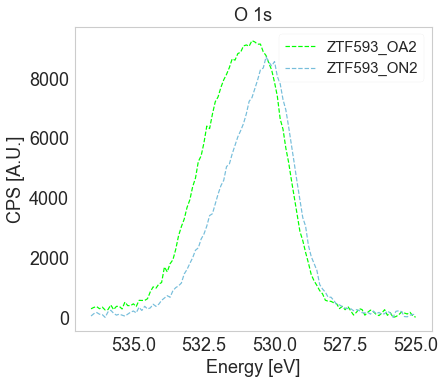

In [181]:
region = 'O1s'
plot_region(ozexp[1], region)
plot_region(ozexp[0], region)
cosmetics_plot()
plt.title('O 1s')

plt.gca().lines

### C 1s

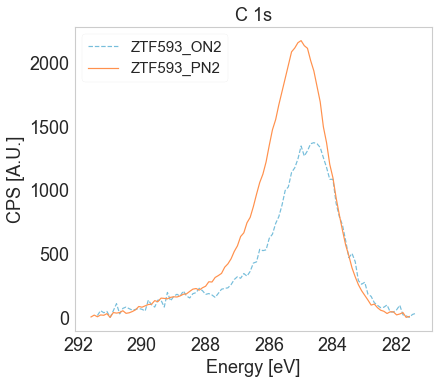

In [185]:
region = 'C1s'
plot_region(ozexp[0], region)
plot_region(plexp[4], region)
cosmetics_plot()
plt.title('C 1s')

plt.gca().lines

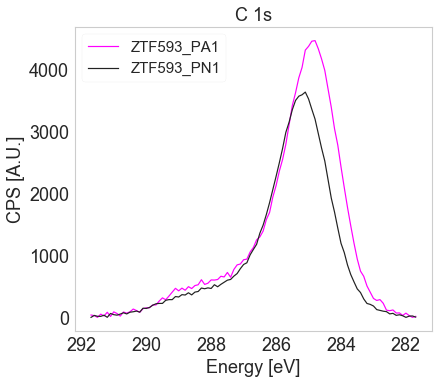

In [189]:
region = 'C1s'
plot_region(plexp[5], region)
plot_region(plexp[6], region)
cosmetics_plot()
plt.title('C 1s')

plt.gca().lines

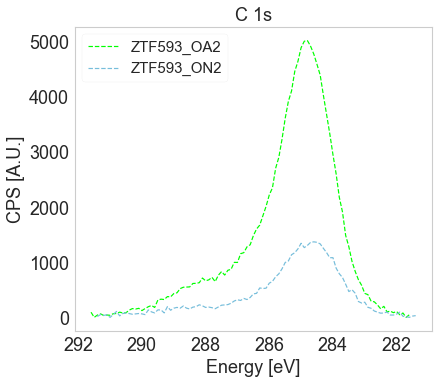

In [187]:
region = 'C1s'
plot_region(ozexp[1], region)
plot_region(ozexp[0], region)
cosmetics_plot()
plt.title('C 1s')

plt.gca().lines

### N 1s

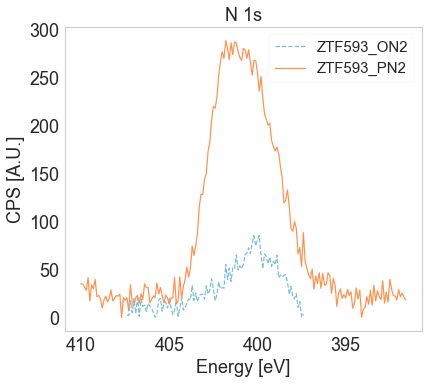

In [190]:
region = 'N1s'
plot_region(ozexp[0], region)
plot_region(plexp[4], region)
cosmetics_plot()
plt.title('N 1s')

plt.gca().lines

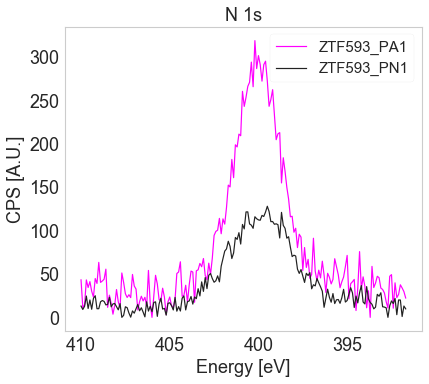

In [191]:
region = 'N1s'
plot_region(plexp[5], region)
plot_region(plexp[6], region)
cosmetics_plot()
plt.title('N 1s')

plt.gca().lines

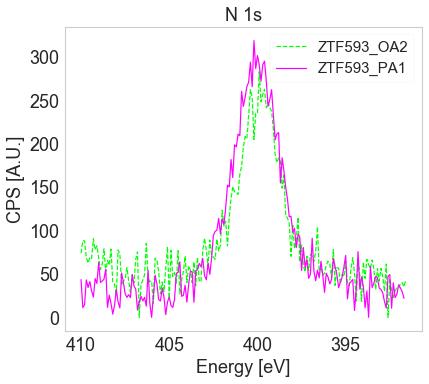

In [195]:
region = 'N1s'
plot_region(ozexp[1], region)
plot_region(plexp[5], region)
cosmetics_plot()
plt.title('N 1s')

plt.gca().lines

### Br 3p

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


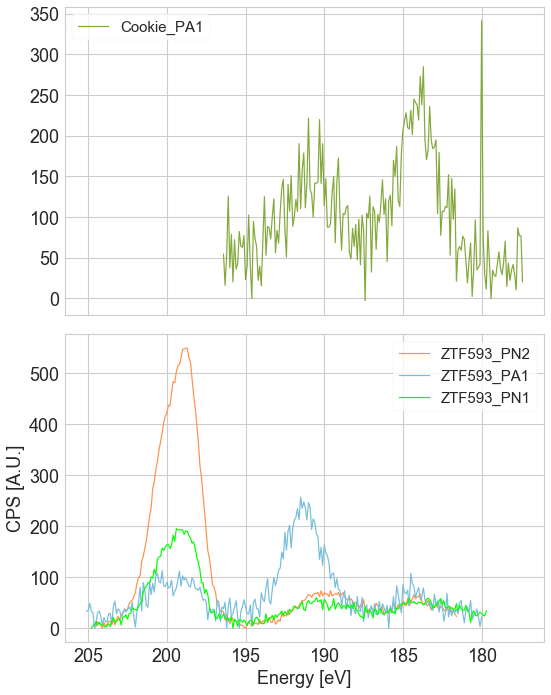

In [104]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10), sharex=True)
plot_region(plexp[2], 'Br3p', ax=ax[0], )
ax[0].grid('on')
ax[0].legend()
for i,xp in enumerate (plexp[4:]):
    plot_region(xp, 'Br3p', ax=ax[1])
ax[1].grid('on')
fig.tight_layout()
cosmetics_plot()

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


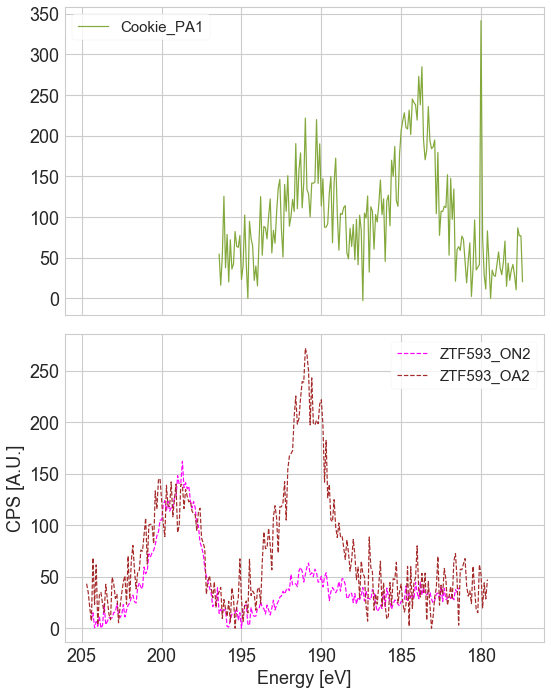

In [106]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10), sharex=True)
plot_region(plexp[2], 'Br3p', ax=ax[0], )
ax[0].grid('on')
ax[0].legend()
for i,xp in enumerate (ozexp[:]):
    plot_region(xp, 'Br3p', ax=ax[1])
ax[1].grid('on')
fig.tight_layout()

### Normalized spectra

In [31]:
def plot_normal_regions(experiments : list, regions : list):
    """Subplots all normalized regions of a list of experiments"""
    rows = int(np.ceil(len(regions) / 3))
    cols = 3
    fig, ax = plt.subplots(rows, cols, figsize=(16, 8))
    for i,r in enumerate(regions):
        for xp in experiments:
            xp_norm = normalise_dfx(xp, inplace=False)
            j, k = i//3, i%3
            if i == len(experiments):   # Set labels from last region
                plot_region(xp_norm, r, ax=ax[j][k], lb=xp_norm.name)
                ax[j][k].set_title('Au_4f')
            else:
                plot_region(xp_norm, r, ax=ax[j][k], lb='__nolabel__')
                ax[j][k].set_title(r)
            cosmetics_plot(ax=ax[j][k], leg = False);
        if len(regions)%2 == 0:
            ax[j][k].invert_xaxis()
    plt.tight_layout()
    fig.legend()

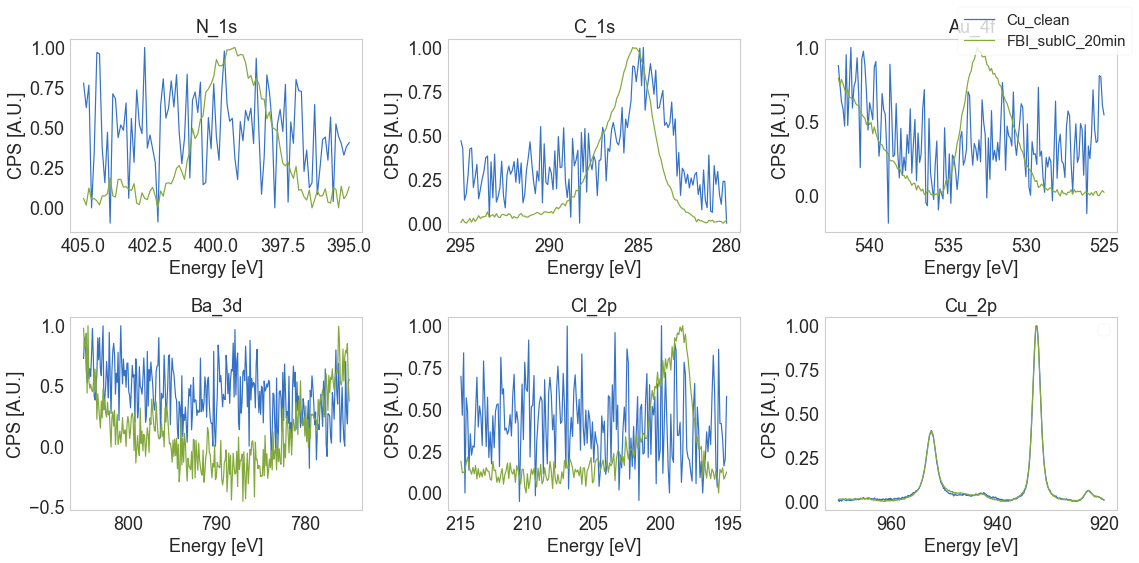

In [32]:
plot_normal_regions(ddeas[:2], regions)

## Integrate areas 

In [198]:
for xp in ddeas:
    xp.area = {}

### C 1s

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:61: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


[2470.3538502857837,
 10465.515849605126,
 14195.74382324506,
 10878.107370206011,
 3946.995503521185,
 5846.390248868732,
 11376.843197586799,
 9029.234133104672,
 12873.31478730206]

<Figure size 460.8x403.2 with 0 Axes>

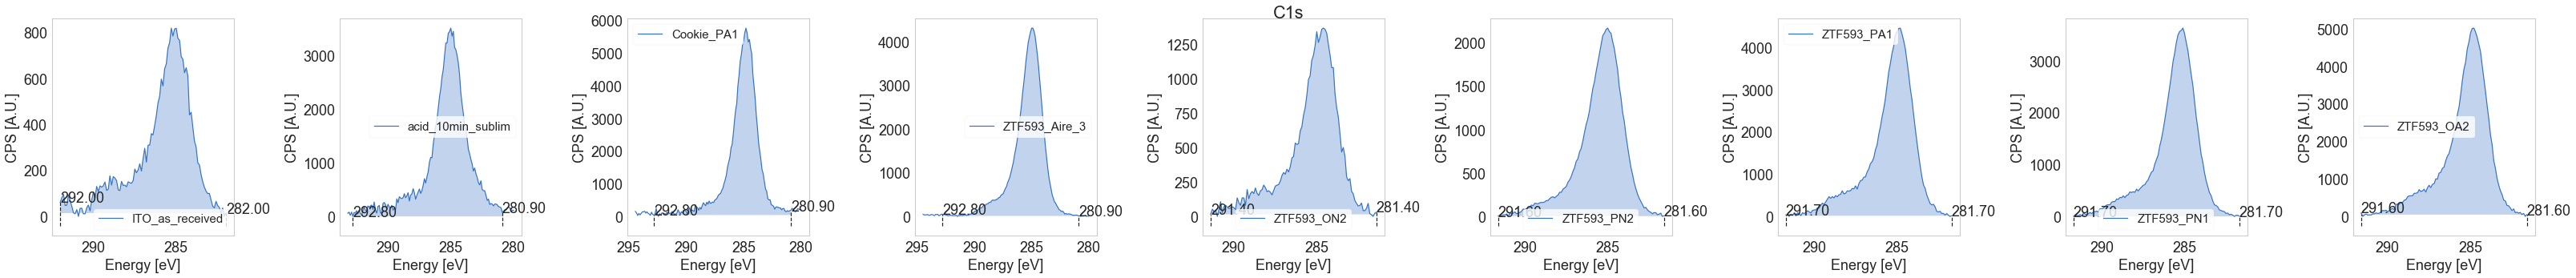

In [199]:
region = 'C1s'
integrateRegions(ddeas, region, indRef=1, asf=asf)

### O 1s

[29511.401183688118,
 29756.33551051126,
 34434.237434843744,
 34312.71019892122,
 26284.369564013865,
 26556.457277361947,
 34159.81756783585,
 25931.43129344485,
 33646.62120051215]

<Figure size 460.8x403.2 with 0 Axes>

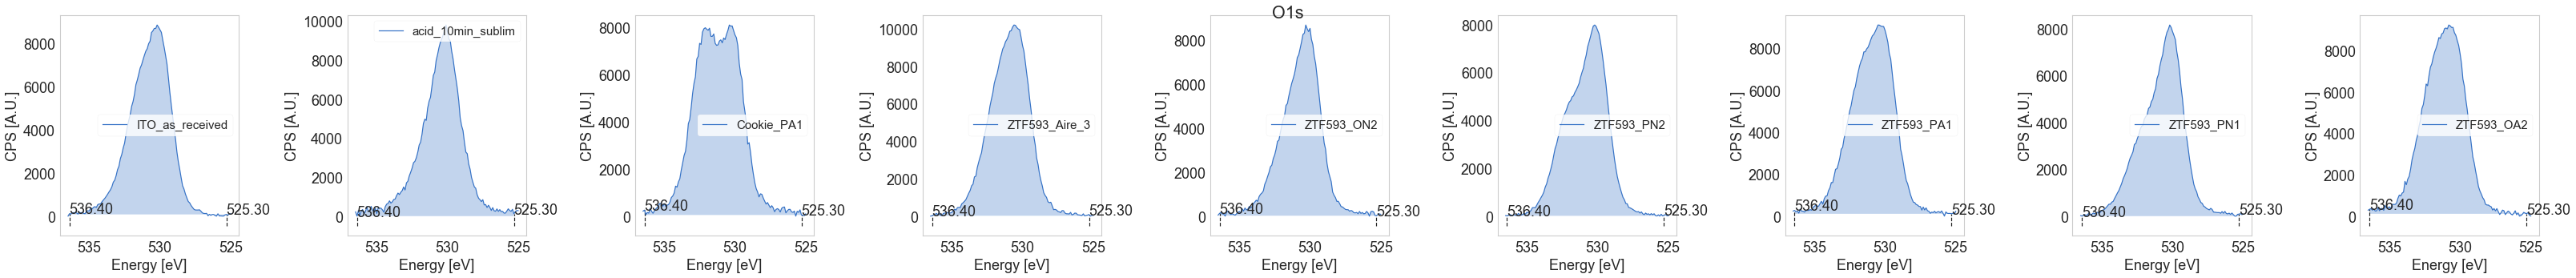

In [200]:
region = 'O1s'
integrateRegions(ddeas, region, indRef=1, asf=asf)

#### Correct for bg substrate abundance

In [201]:
"""for xp in ddeas[1:]:
    uncorr_area = xp.area['O1s']
    xp.area.update({'O1s': uncorr_area - ddeas[0].area['O1s']})"""

"for xp in ddeas[1:]:\n    uncorr_area = xp.area['O1s']\n    xp.area.update({'O1s': uncorr_area - ddeas[0].area['O1s']})"

### N 1s

[542.2682190474343,
 3901.2514897913707,
 2191.6263492462576,
 1712.6400817495346,
 307.7931623345731,
 1406.9828597142052,
 1259.1609485289282,
 625.3326396655506,
 1212.7739311301568]

<Figure size 460.8x403.2 with 0 Axes>

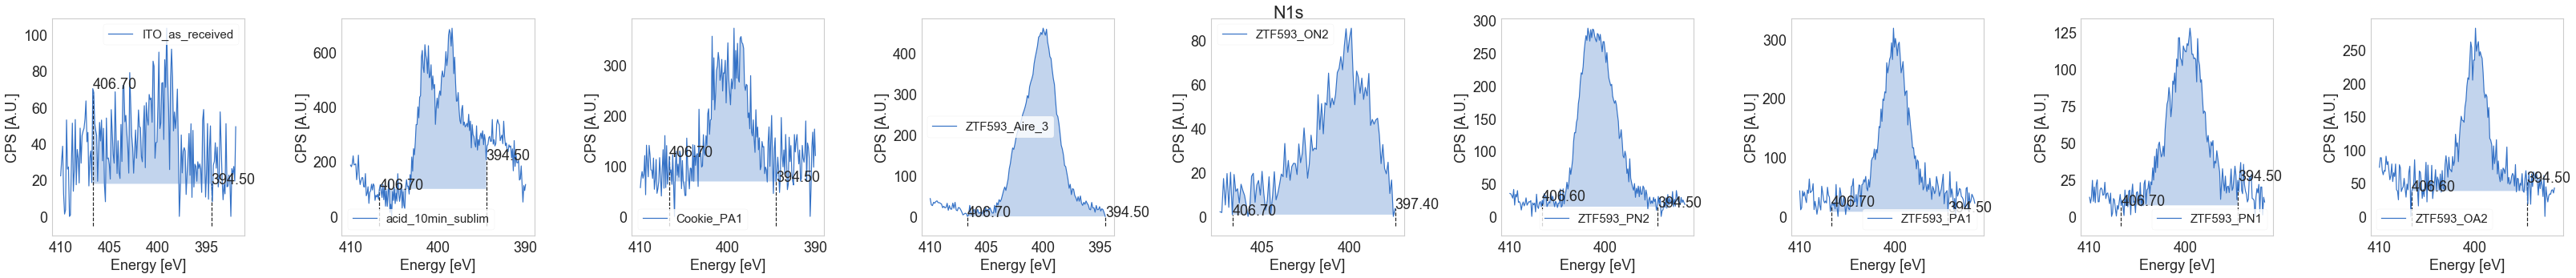

In [202]:
region = 'N1s'
integrateRegions(ddeas, region, indRef=3, asf=asf)

### Br 3p

[901.9156736331005,
 937.6996340386601,
 996.6239366121631,
 959.3407080506469,
 817.8602562328892,
 2145.222109441838,
 1428.5885659357507,
 1002.4378525998047,
 1596.807054978947]

<Figure size 460.8x403.2 with 0 Axes>

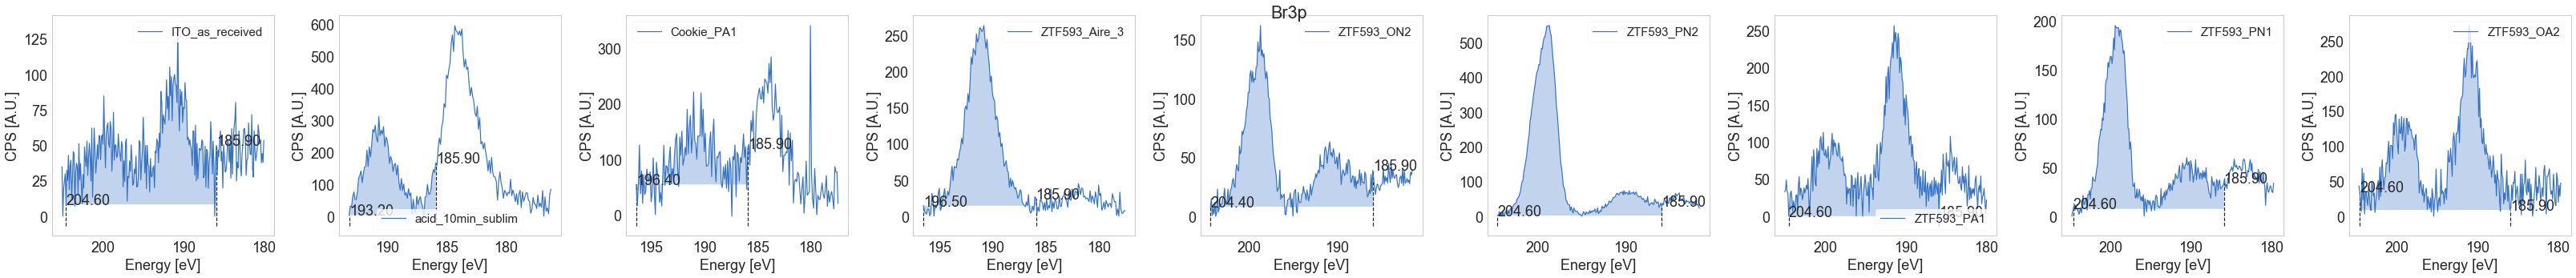

In [203]:
region = 'Br3p'
integrateRegions(ddeas, region, indRef=6, asf=asf)

In [204]:
flag_fill = True
indRef = 0
exps = ddeas
ind = flexible_integration_limits(exps[indRef], region=region, doublePeak=0, flag_plot=False)
lmidx, rmidx = ind[-2:] # The index of the minima are always the last two
plt.clf()

xRef = exps[indRef].dfx[region].dropna().energy     # Use the energy array of reference xp to crop the other xp's
xRef[lmidx], xRef[rmidx]

(205.0, 186.1)

<Figure size 460.8x403.2 with 0 Axes>

Text(0.5, 0.98, 'Br3p')

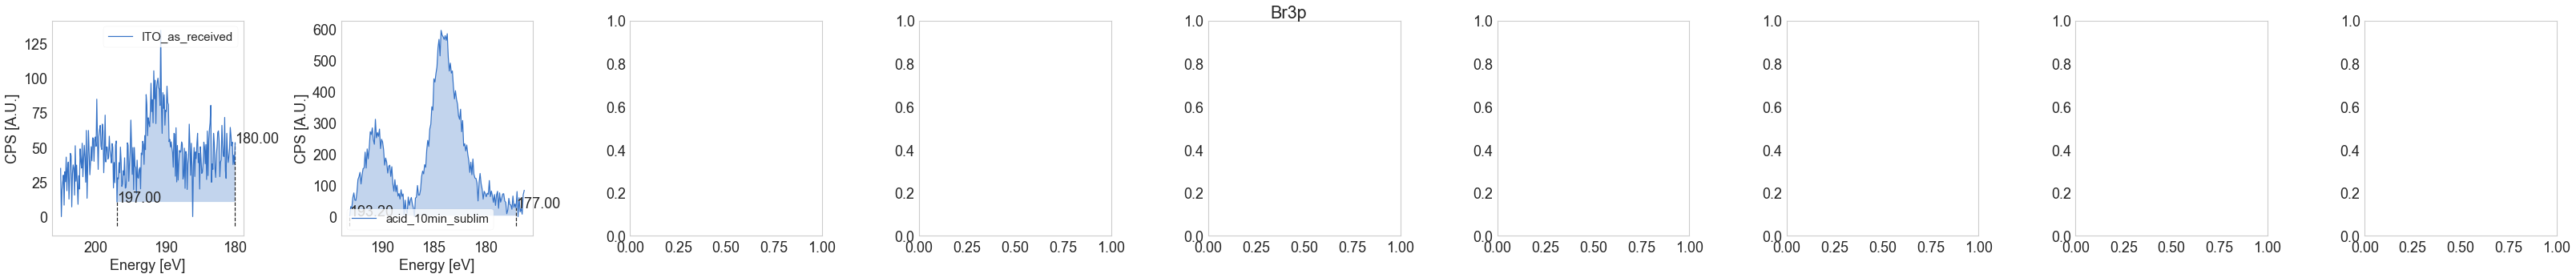

In [205]:
fig, ax = plt.subplots(1, len(exps), figsize=(len(exps)*5, 5) )
area = []
for i, xp in enumerate(exps[:2]):
    try:
        y = xp.dfx[region].dropna().counts
    except KeyError as e:          #Check the region exists in this xp
        print(e, 'region does not exist in ' + xp.name)
        xp.area.update({region: 0})
        continue

    x = xp.dfx[region].dropna().energy
    ax[i].plot(x, y, label=xp.name)

    xpCrop = crop_spectrum(xp, region, eup = 197, edw = 177)
    yc = xpCrop.dfx[region].dropna().counts.values
    xc = xpCrop.dfx[region].dropna().energy.values    # Integrate only in the cropped range

    step = x[0] - x[1]
    area.append(np.trapz(yc, dx=step))

    try:
        xp.area.update({region : area[-1]/asf[region]})
    except (KeyError, NameError) as e:
        print(e, ', returning raw area')
        pass

    if flag_fill:
        if yc[0] > yc[-1]:
            ax[i].fill_between(xc , y1 = yc[-1], y2 = yc, alpha=0.3)
        else:
            ax[i].fill_between(xc, y1 = yc[0], y2 = yc, alpha=0.3)
        ybase = ax[i].get_ylim()[0]

        for j in [0, -1]:
            ax[i].vlines(xc[j], ymin=ybase, ymax=yc[j], linestyles='--')
            ax[i].text(s='%.2f'%xc[j], x = xc[j], y = yc[j])
    cosmetics_plot(ax=ax[i])
plt.tight_layout()
fig.suptitle(region)

### Br 3d (no Cl overlap)

In [206]:
ddeas[8].area['Br3d'] = 0

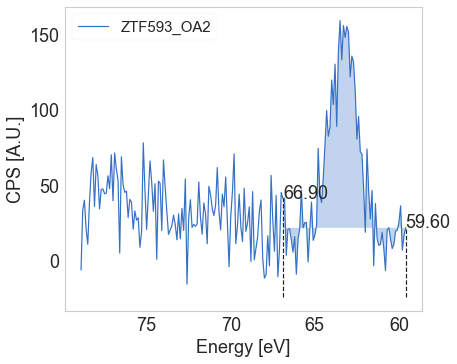

In [207]:
xp = ddeas[8]
region = 'Br3d'
y = xp.dfx[region].dropna().counts
x = xp.dfx[region].dropna().energy
ax = plt.gca()
ax.plot(x, y, label=xp.name)

xpCrop = crop_spectrum(xp, region, eup = 67, edw = None)
yc = xpCrop.dfx[region].dropna().counts.values
xc = xpCrop.dfx[region].dropna().energy.values    # Integrate only in the cropped range

step = x[0] - x[1]
area.append(np.trapz(yc, dx=step))

try:
    xp.area.update({region : area[-1]/asf[region]})
except (KeyError, NameError) as e:
    print(e, ', returning raw area')
    pass

if yc[0] > yc[-1]:
    ax.fill_between(xc , y1 = yc[-1], y2 = yc, alpha=0.3)
else:
    ax.fill_between(xc, y1 = yc[0], y2 = yc, alpha=0.3)
ybase = ax.get_ylim()[0]

for j in [0, -1]:
    ax.vlines(xc[j], ymin=ybase, ymax=yc[j], linestyles='--')
    ax.text(s='%.2f'%xc[j], x = xc[j], y = yc[j])
cosmetics_plot(ax=ax)

### In 3d

[116567.54094707305,
 119135.01700021222,
 124813.27942113036,
 121974.46770109612,
 125850.18606806459,
 122793.31518824837,
 114381.6868463191,
 117826.4010752428,
 121888.65112805404]

<Figure size 460.8x403.2 with 0 Axes>

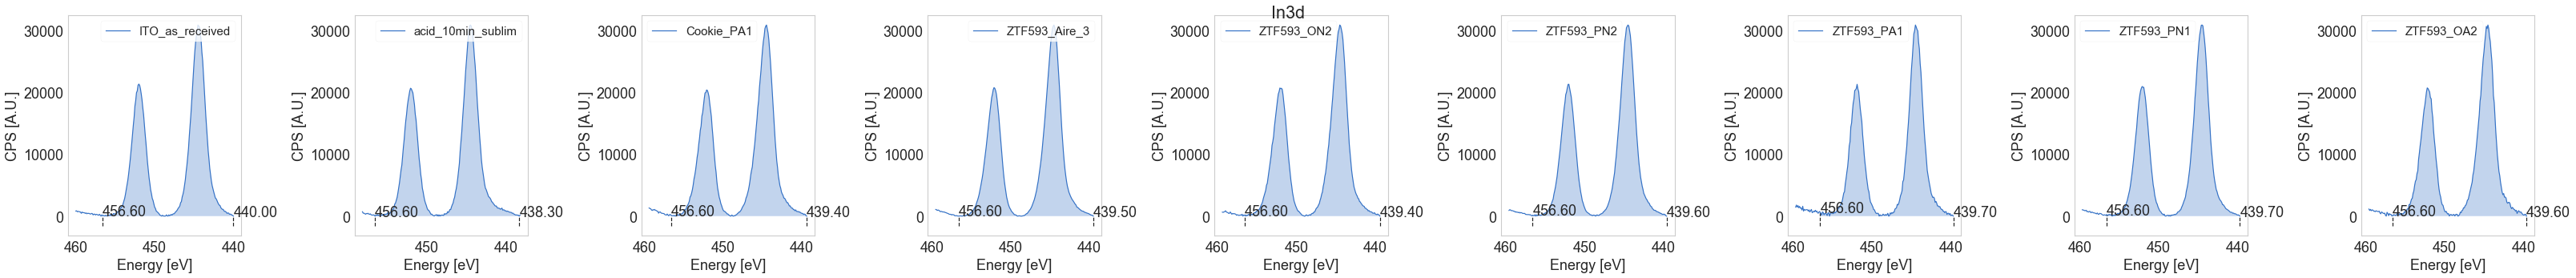

In [208]:
region = 'In3d'
integrateRegions(ddeas, region, indRef=1, asf=asf)

### Sn 3d

[14716.869905506335,
 14652.644234778147,
 13630.76408411936,
 15361.988631727374,
 17294.830232086788,
 13114.144816693653,
 19081.75496564439,
 13737.56012588262,
 19831.22330029735]

<Figure size 460.8x403.2 with 0 Axes>

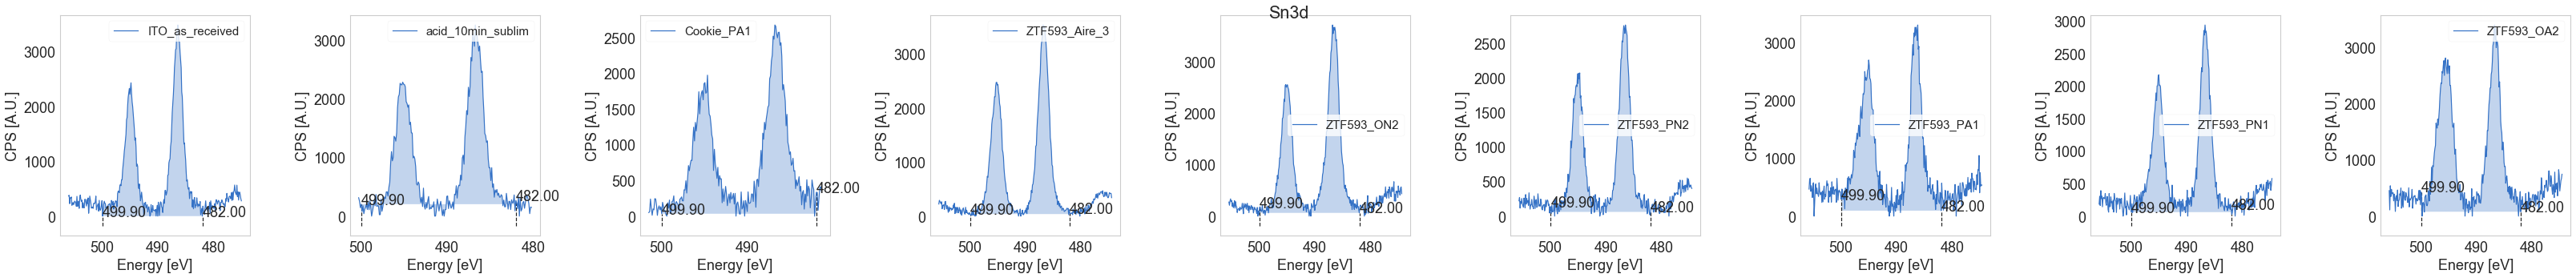

In [210]:
region = 'Sn3d'
integrateRegions(ddeas, region, indRef=0, asf=asf)

## Estimate real Br 3p

[Text(0.5, 1.0, 'Br3p')]

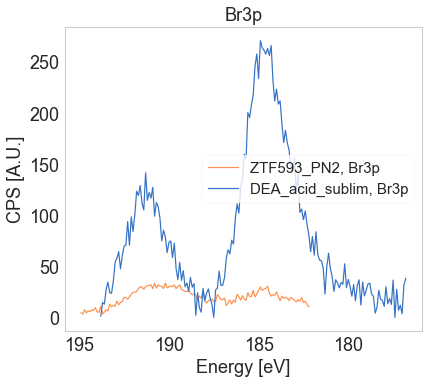

In [252]:
region='Br3p'
xp_crop = crop_spectrum(ddeas[4], region, eup=195)
plot_region(xp_crop, region)
plot_region(ddeas[0], region)
cosmetics_plot()
plt.gca().set(title='Br3p')

##### Check that area ratio between Br 3p 3/2 and Br 3p 1/2 is 2/1

[89, 63, 164]

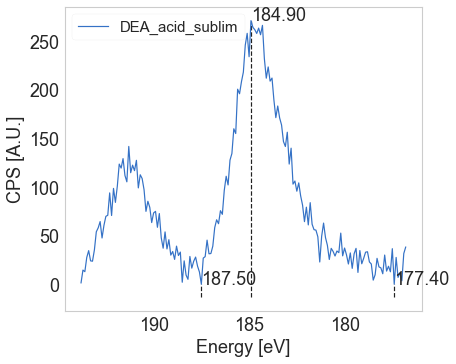

In [254]:
flexible_integration_limits(ddeas[0], region, doublePeak=0, flag_plot=False)

2.2957719165485555

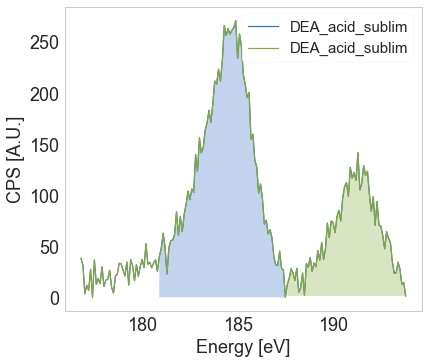

In [272]:
_, area_3p3half = compare_areas(ddeas[0], ddeas[0], region, rmidx=130, lmidx=ind[1], flag_fill=True)
_, area_3p1half = compare_areas(ddeas[0], ddeas[0], region, rmidx=ind[1], lmidx=0, flag_fill=True)
area_ratio = area_3p3half/area_3p1half
area_ratio

##### Now integrate ZTF593_PN2

(373.81389482760204, 1262.0540597191211)

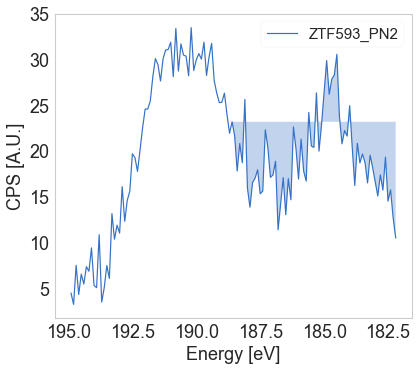

In [276]:
compare, area_DDEA = compare_areas(xp_crop, xp_crop, region, rmidx=130, lmidx=ind[1], flag_fill=True)
# _, area_3p1half = compare_areas(xp_crop, xp_crop, region, rmidx=ind[1], lmidx=0, flag_fill=True)
area_DDEA *= 3
area_DDEA, area_3p1half+area_3p3half

In [292]:
ddeas[4].area.update({'Br3p': area_DDEA/asf['Br3p']})

In [294]:
ddeas[4].name

'ZTF593_PN2'

In [293]:
num, denom = (('C1s', 'C1s', 'N1s', 'O1s'), ('Br3p', 'N1s', 'Br3p', 'In3d'))
make_stoichometry_table(ddeas,  num=num, denom=denom)

Experiment	C/Br	C/N	N/Br	O/In	
DEA_acid_sublim	12.62	 3.51	 3.59	 1.51	 
Cookie_NaOH_BuOH	26.24	 9.16	 2.87	 1.69	 
ZTF593_Aire3	39.93	 10.32	 3.87	 1.72	 
ZTF593_ON2	16.81	 21.69	 0.77	 1.28	 
ZTF593_PN2	25.35	 6.55	 3.87	 1.32	 
ZTF594_ON15_F1	31.29	 7.20	 4.35	 1.44	 
ZTF594_PN15_F1	27.63	 9.39	 2.94	 1.97	 
ZTF594_ON1_F1	22.94	 9.65	 2.38	 1.38	 


# Stoichiometry 

In [212]:
ozexp, plexp = [], []
for xp in ddeas:
    if '_O' in xp.name:
        ozexp.append(xp)
    else:
        plexp.append(xp)
[xp.name for xp in ozexp]

['ZTF593_ON2', 'ZTF593_OA2']

In [214]:
num, denom = (('C1s', 'C1s', 'N1s', 'O1s'), ('O1s', 'N1s', 'Br3p', 'In3d'))
make_stoichometry_table(plexp[1:],  num=num, denom=denom)

Experiment	C/O	C/N	N/Br	O/In	
acid_10min_sublim	0.84	 4.32	 2.91	 1.53	 
Cookie_PA1	0.99	 10.44	 4.86	 1.69	 
ZTF593_Aire_3	0.76	 10.24	 3.94	 1.72	 
ZTF593_PN2	0.53	 6.70	 1.45	 1.33	 
ZTF593_PA1	0.80	 14.56	 1.95	 1.83	 
ZTF593_PN1	0.84	 23.27	 1.38	 1.35	 


In [215]:
num, denom = (('C1s', 'C1s', 'N1s', 'O1s'), ('O1s', 'N1s', 'Br3p', 'In3d'))
make_stoichometry_table(ozexp,  num=num, denom=denom)

Experiment	C/O	C/N	N/Br	O/In	
ZTF593_ON2	0.36	 20.66	 0.83	 1.28	 
ZTF593_OA2	0.92	 17.11	 1.68	 1.69	 


In [66]:
print('Nominal')
print('C/Br \t C/N \t N/Br \t O/In')
print(14, '\t', '%.3f'%(14/2), '\t', 2, '\t %.3f' %(18/74) )

Nominal
C/Br 	 C/N 	 N/Br 	 O/In
14 	 7.000 	 2 	 0.243


In [67]:
num, denom = (('C1s', 'C1s', 'N1s', 'O1s'), ('Br3d', 'N1s', 'Br3d', 'In3d'))
make_stoichometry_table([ddeas[8], ddeas[8]],  num=num, denom=denom)

Experiment	C/Br	C/N	N/Br	O/In	
ZTF593_OA2	119.65	 17.11	 7.00	 1.69	 
ZTF593_OA2	119.65	 17.11	 7.00	 1.69	 


## Deviation from nominal value

In [98]:
def make_stodev_table(exps : list, num : list, denom : list, nominal: list):
    """Print stoichiometry table of the experiments exps at the regions in num/denom
    Example: table_print(oxid_exps, ('N1s', 'C1s'), ('Br3p', 'O1s'))
    will print the stoichiometry N/C, Br/O for the passed experiments"""
    make_header(num = num, denom = denom)
    for k, xp in enumerate(exps):
        tot_dev = 0
        row = xp.name + '\t'
        for i, j, m in zip (num, denom, nominal):
            area = xp.area[i]/xp.area[j]
            dev = (m - area)/m
            tot_dev += dev**2
            row += ('%.2f\t ' %dev)
        row += ('%.2f' %np.sqrt(tot_dev))
        print(row )

In [99]:
num, denom = (('C1s', 'C1s', 'N1s'), ('Br3p', 'N1s', 'Br3p'))
nominal = [14, 7, 2, 18/74]
make_stodev_table(proc_exps,  num=num, denom=denom, nominal=nominal)

Experiment	C/Br	C/N	N/Br	
DEA_acid_sublim	0.10	 0.50	 -0.80	 0.94
Cookie_NaOH_BuOH	-0.87	 -0.31	 -0.43	 1.02
ZTF593_Aire3	-1.85	 -0.47	 -0.93	 2.13
ZTF593_ON2	-0.20	 -2.10	 0.61	 2.20
ZTF594_PN15_F1	-0.97	 -0.34	 -0.47	 1.13
ZTF594_ON15_F1	-1.24	 -0.03	 -1.17	 1.70


In [97]:
np.sqrt(1.85**2 + 0.47**2 + 0.93**2), np.sqrt(0.97**2 + 0.34**2 + 0.47**2)

(2.1232757710669614, 1.1302212172844748)

## Debromization in sublimated DDEA acid

In [154]:
file = '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/20200131_ITO_DEA_acid_10min_sublim_180º.xy'
xp_debr = xps_data_import(file, name='acid_10min_subl_anneal_180grad')

In [155]:
xp_debr.dfx.rename_axis({'In3d5/2': 'In3d'}, axis=1, copy=False, inplace=True)
xp_debr.dfx.rename_axis({'Sn3d5/2': 'Sn3d'}, axis=1, copy=False, inplace=True)
xp_debr.dfx.rename_axis({'Br3p3/2_(2)': 'Br3p'}, axis=1, copy=False, inplace=True)
xp_debr.ls = 'solid'
xp_debr.color = 'r'

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  """Entry point for launching an IPython kernel.
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  This is separate from the ipykernel package so we can avoid doing imports until


### Align with In 3d

Text(0.5, 1.0, 'In 3d')

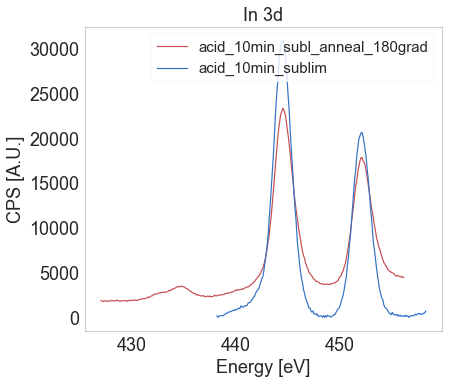

In [158]:
region = 'In3d'
shift = find_shift(xp_debr, xpRef=ddeas[1], region=region)
align_dfx(xp_debr, shift, inplace = True)
plot_region(xp_debr, region)
plot_region(ddeas[1], region)

plt.title('In 3d')

### Br 3p region

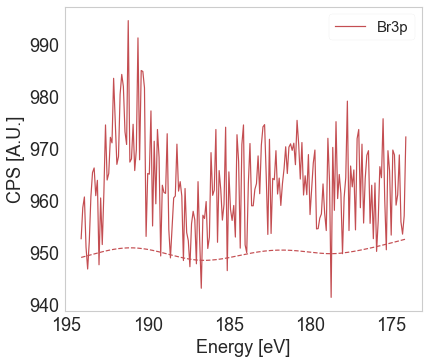

In [159]:
region='Br3p'
bg_debr = subtract_als_bg(xp_debr, region, )

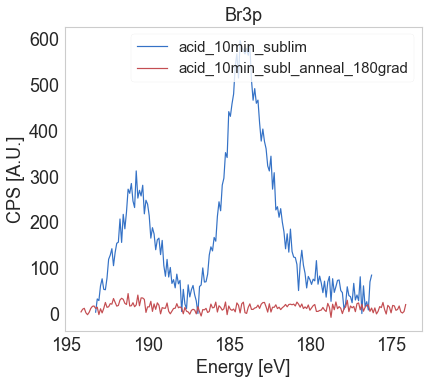

In [166]:
plot_region(plexp[1], region)
plot_region(bg_debr, region)
plt.gca().set(title=region)
cosmetics_plot()

##### Clear debromization

# SDEA 

## Read processed experiments

In [9]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/**/*.xy'

files = glob.glob(path, recursive=True)
files.sort()

files_new = ['/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201124_ITO_clean.xy',
             '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201106_ITO_as_received.xy',
            '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/proc/20200131_ITO_DEA_acid_10min_sublim.xy']

for f in files:
    if '/proc' in f:
        files_new.append(f)
        
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201124_ITO_clean.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201106_ITO_as_received.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/proc/20200131_ITO_DEA_acid_10min_sublim.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/proc/20201029_ITO_DEA_ZTF594_PN15_F1.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/proc/20201030_ITO_DEA_ZTF594_ON15_F1.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/proc/20201102_ITO_DEA_ZTF594_ON1_F1.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/proc/20201104_ITO_DEA_ZTF594_PN1_F1.xy']

In [10]:
sdeas = []
colors = ['yellow', 'brown', 'b', 'g', 'c', 'magenta', 'k', 'g']
for f, c in zip(files, colors):
    ls = 'solid'
    if '_O' in f: 
        ls = 'dashed'
    print(f)
# for f in files:
    sdeas.append(read_processed_xp(f, color=c, ls=ls))

/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201124_ITO_clean.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201106_ITO_as_received.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/proc/20200131_ITO_DEA_acid_10min_sublim.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/proc/20201029_ITO_DEA_ZTF594_PN15_F1.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/proc/20201030_ITO_DEA_ZTF594_ON15_F1.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/proc/20201102_ITO_DEA_ZTF594_ON1_F1.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/proc/20201104_ITO_DEA_ZTF594_PN1_F1.xy


## Show individual plots

In [19]:
sdeas[0].dfx.columns

MultiIndex(levels=[['Br3d', 'Br3p', 'C1s', 'In3d', 'N1s', 'O1s', 'Si2p', 'Sn3d', 'overview'], ['counts', 'energy']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
           names=['range', 'properties'])

In [118]:
regions= ['O1s', 'N1s', 'C1s', 'Sn3d', 'In3d', 'Br3p']

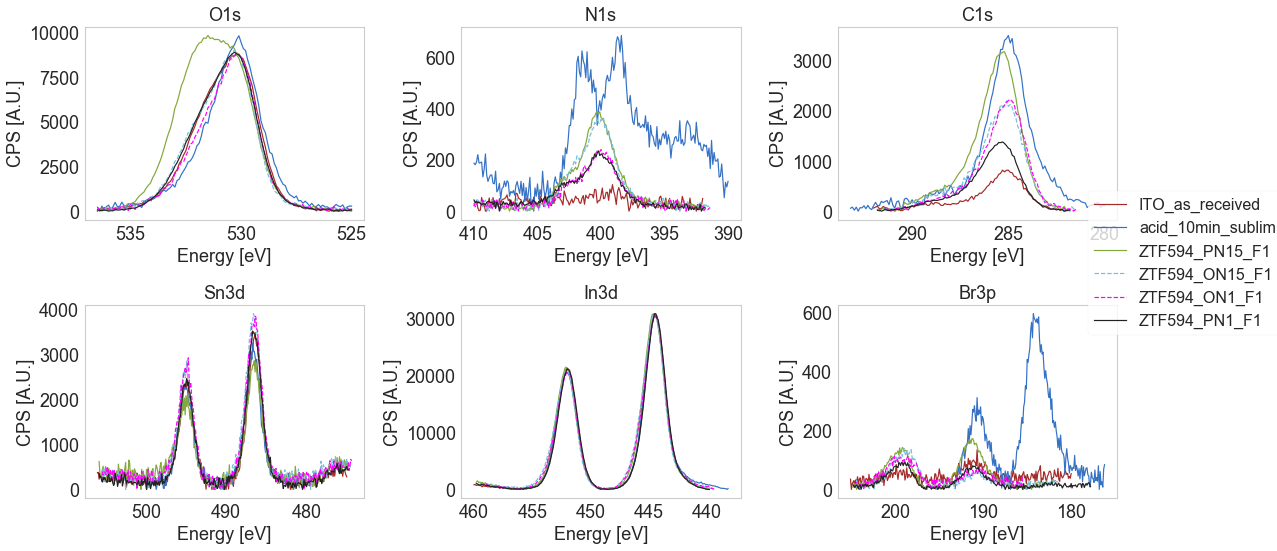

In [119]:
plot_xp_regions(sdeas, regions, ncols=3)

In [ ]:
fit_double_voigt(sdeas[4], region='Br3p');

## Group by plasma/ozone:

In [33]:
ozexp, plexp = [], []
for xp in sdeas:
    if '_O' in xp.name:
        ozexp.append(xp)
    elif '_P' in xp.name:
        plexp.append(xp)
[xp.name for xp in ozexp]

['ZTF594_ON15_F1', 'ZTF594_ON1_F1']

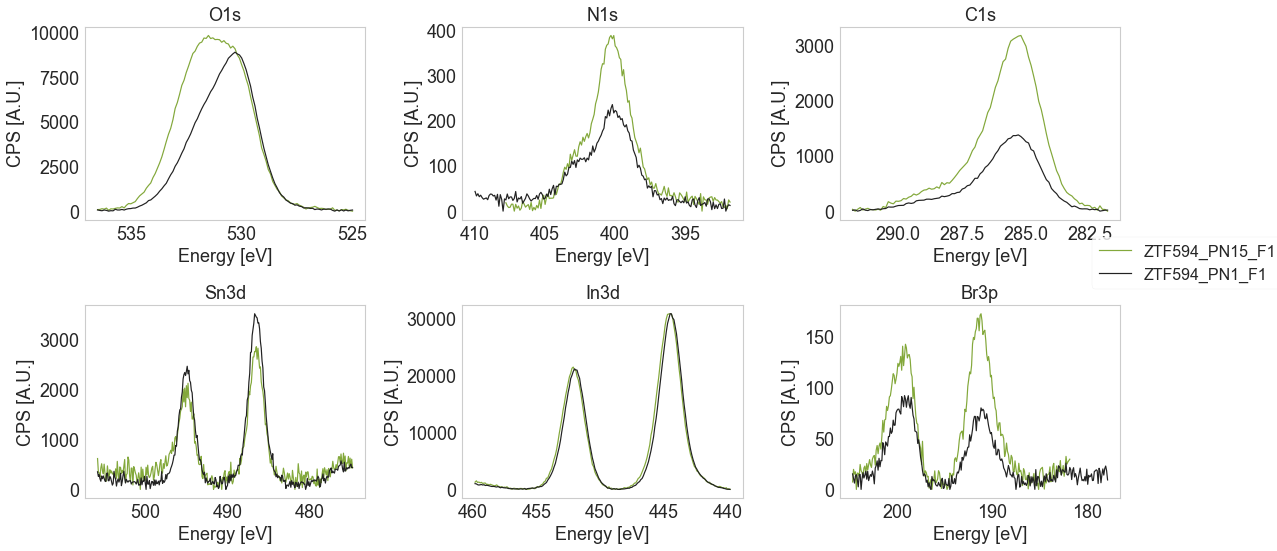

In [76]:
plot_xp_regions(plexp, regions, ncols=3)

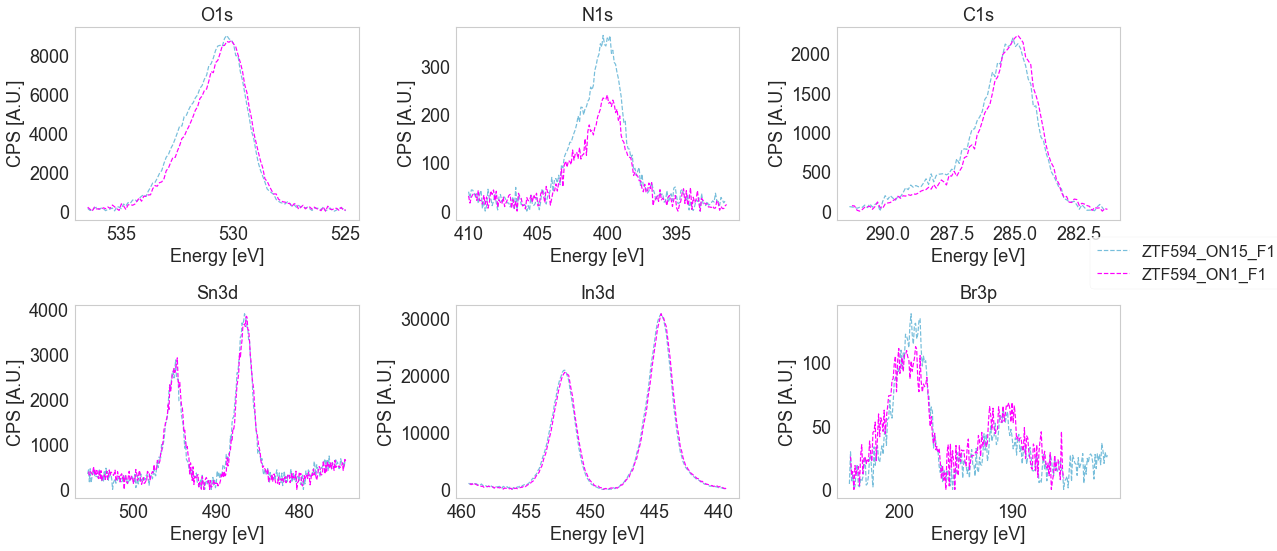

In [74]:
plot_xp_regions(ozexp, regions, ncols=3)

## Compare plasma to ozone

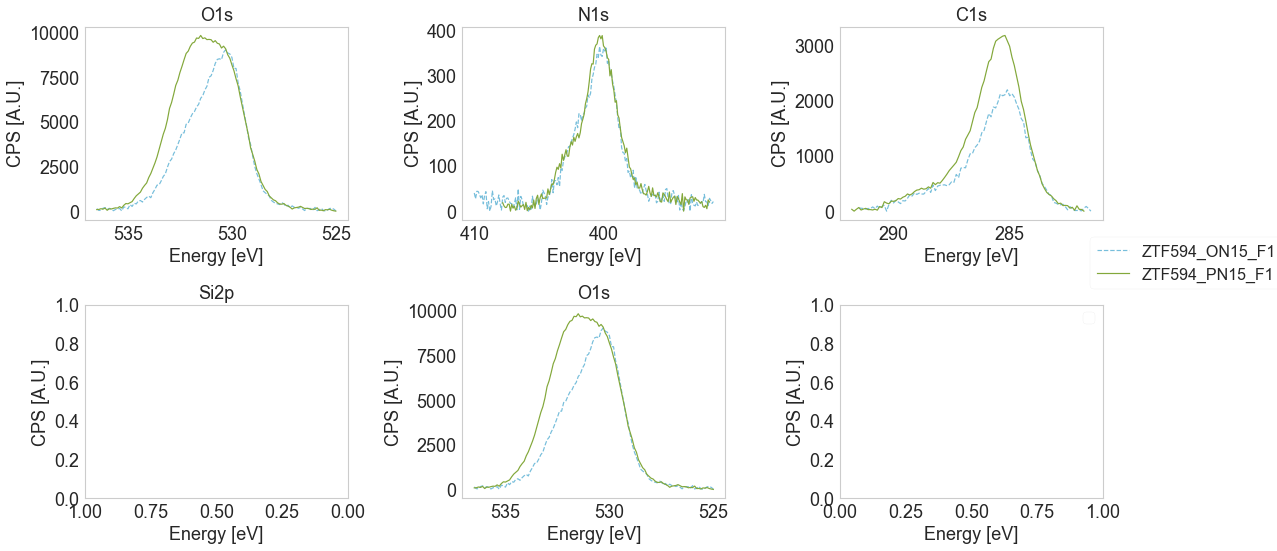

In [78]:
regions = ['O1s', 'N1s', 'C1s', 'Si2p', 'O1s']
plot_xp_regions([ozexp[0], plexp[0]], regions, ncols=3)

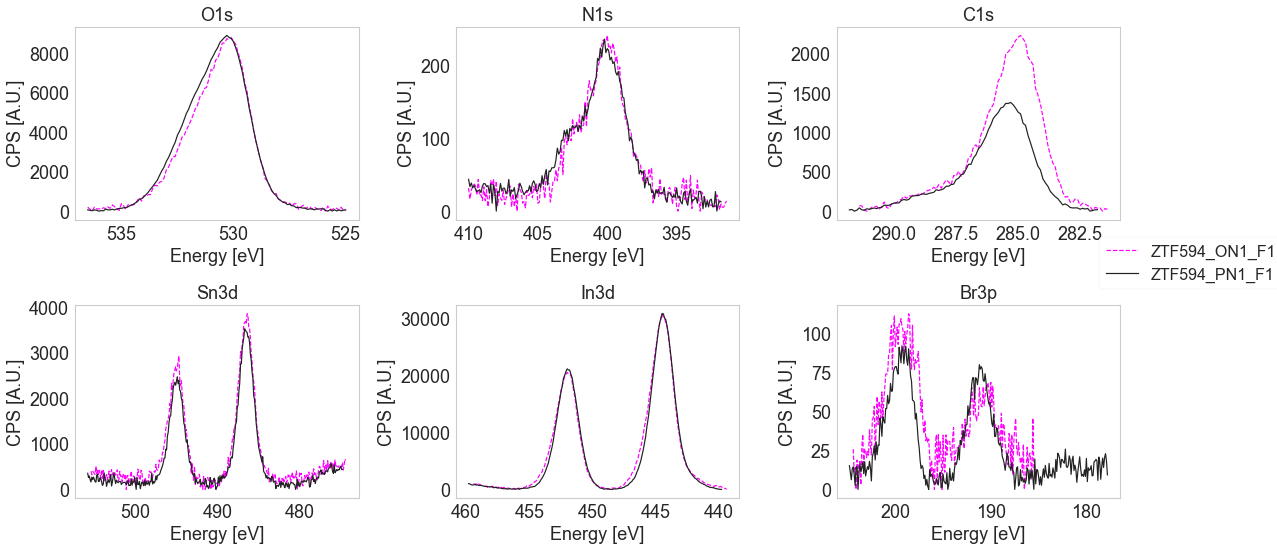

In [75]:
plot_xp_regions([ozexp[1], plexp[1]], regions, ncols=3)

### Show Si 2p

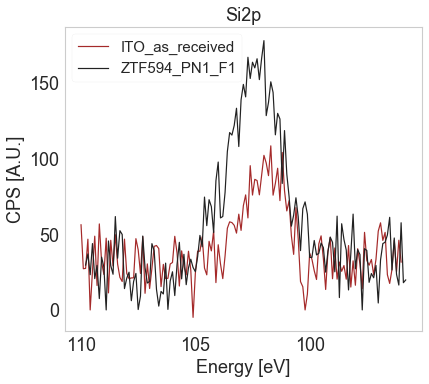

In [173]:
region = 'Si2p'
plot_region(sdeas[0], region)
plot_region(sdeas[-1], region)
# plt.axvline(x=103)
plt.gca().set(title=region)
cosmetics_plot()

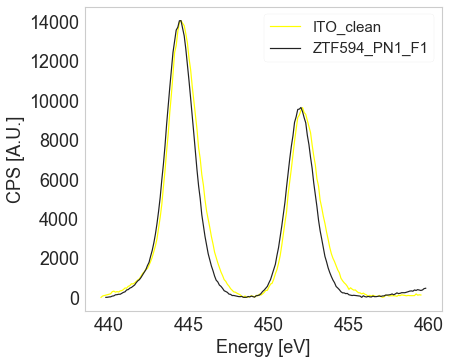

In [57]:
plot_region(sdeas[0], 'In3d')
plot_region(sdeas[6], 'In3d')

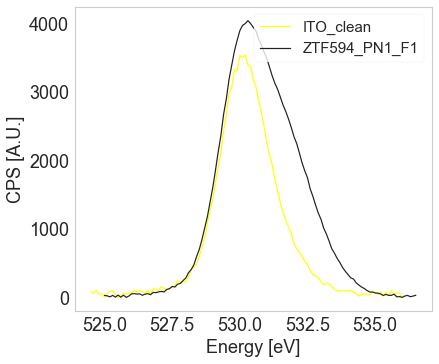

In [58]:
plot_region(sdeas[0], 'O1s')
plot_region(sdeas[6], 'O1s')

In [31]:
shift = find_shift(sdeas[0], sdeas[6], 'In3d')
align_dfx(sdeas[0], shift, inplace=True, );

XPS_experiment(path='/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/proc/20201104_ITO_DEA_ZTF594_PN1_F1.xy', delimiters="([42, 1275, 1534, 1663, 1842, 2071, 2370, 2539, 2878], [1205, 231, 101, 151, 201, 271, 141, 311, 271], ['overview', 'Br3p(2)', 'C1s', 'O1s', 'N1s', 'In3d', 'Si2p', 'Sn3d', 'Br3p'])", name='ZTF594_PN1_F1', label='20201104_ITO_DEA_ZTF594_PN1_F1', date='2020.11.04', other_meta='ITO_DEA_ZTF594_PN1_F1', dfx=       Br3p               Br3p(2)                C1s              In3d  \
     energy        counts  energy      counts energy     counts energy   
0     204.8  6.914988e+00   204.8  849.429091  291.8   6.932560  459.8   
1     204.7  4.922524e+00   204.7  844.350293  291.7   9.700506  459.7   
2     204.6  2.827520e+00   204.6  776.421359  291.6   0.000000  459.6   
3     204.5  6.035949e+00   204.5  858.316989  291.5   5.689929  459.5   
4     204.4  6.617116e+00   204.4  822.130548  291.4  18.775033  459.4   
5     204.3  4.331657e+00   204.3  856.4

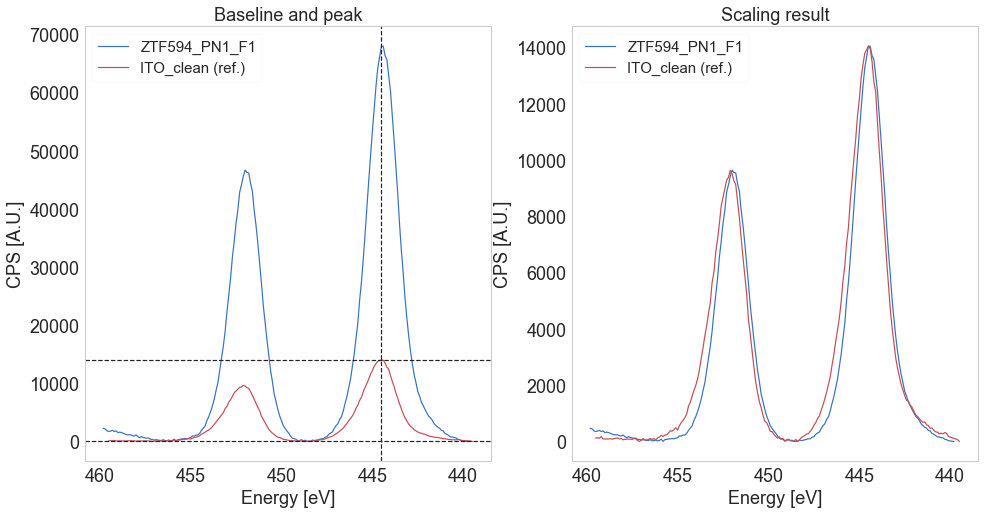

In [56]:
scalef = scale_and_plot_spectra(sdeas[6], sdeas[0], 'In3d')
scale_dfx(sdeas[6], scalef, inplace=True)

## Integrate areas 

In [14]:
for xp in sdeas:
    xp.area = {}

### C 1s

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:64: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


[355.89029952134257,
 2412.8638502857707,
 9974.831530003758,
 8989.495540299486,
 6561.904163444779,
 6314.898585845901,
 4097.3400672241505]

<Figure size 460.8x403.2 with 0 Axes>

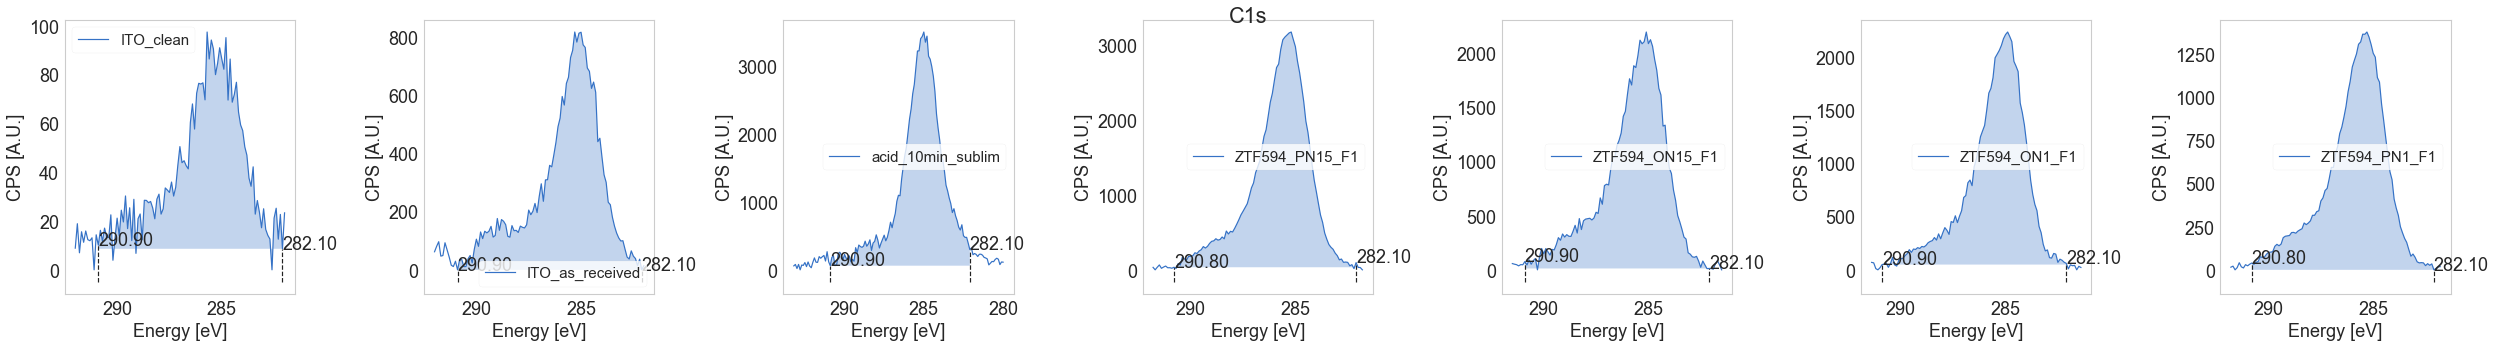

In [15]:
region = 'C1s'
integrateRegions(sdeas, region, indRef=1, asf=asf)

### O 1s

[8852.899323945625,
 29494.773556170643,
 29586.556649739712,
 39149.44158409927,
 29007.961477822213,
 27500.681954830125,
 29130.194452712076]

<Figure size 460.8x403.2 with 0 Axes>

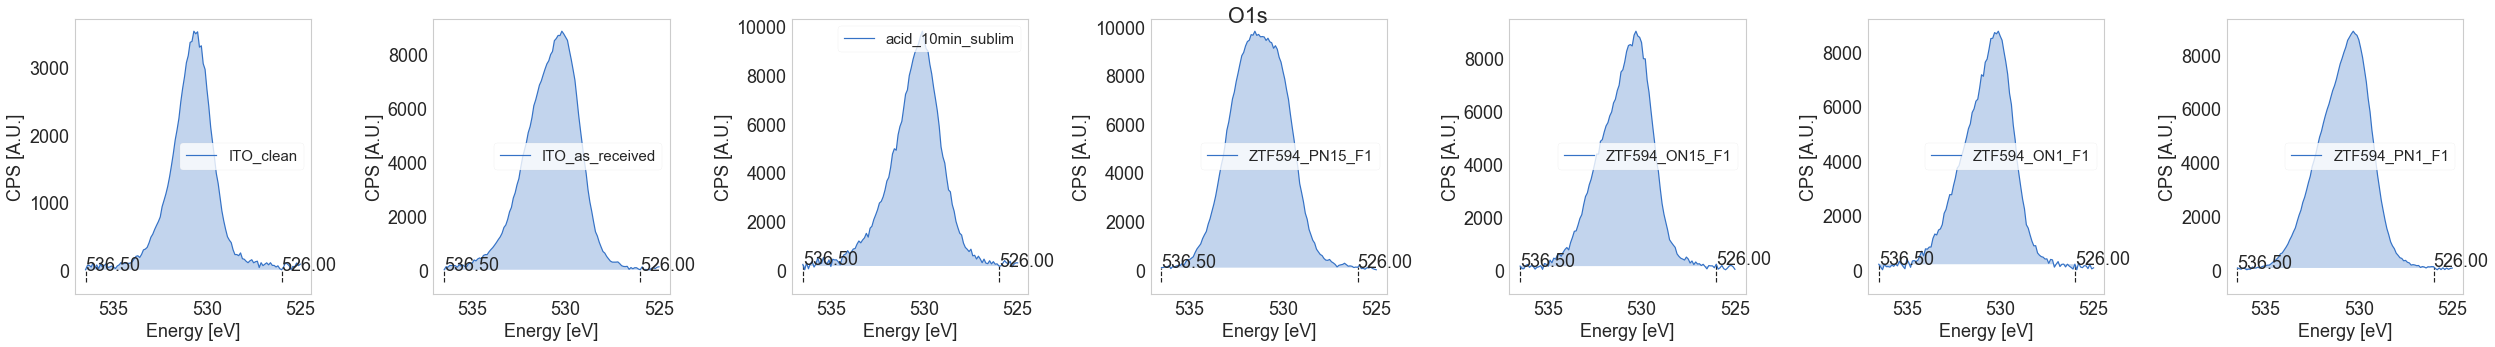

In [16]:
region = 'O1s'
integrateRegions(sdeas, region, indRef=1, asf=asf)

In [28]:
sdeas[6].area['O1s'] -= sdeas[0].area['O1s']

In [61]:
sdeas[6].area

{'C1s': 13842.365091973483,
 'O1s': 6201.541407871071,
 'N1s': 2292.549381836999,
 'Br3p': 303.80407041487763,
 'Si2p': 659.4633180926064}

### N 1s

[91.82727385905466,
 577.2737312664829,
 4131.040969065623,
 1527.853361396516,
 1469.21259010349,
 1066.752203317081,
 1093.5460551362485]

<Figure size 460.8x403.2 with 0 Axes>

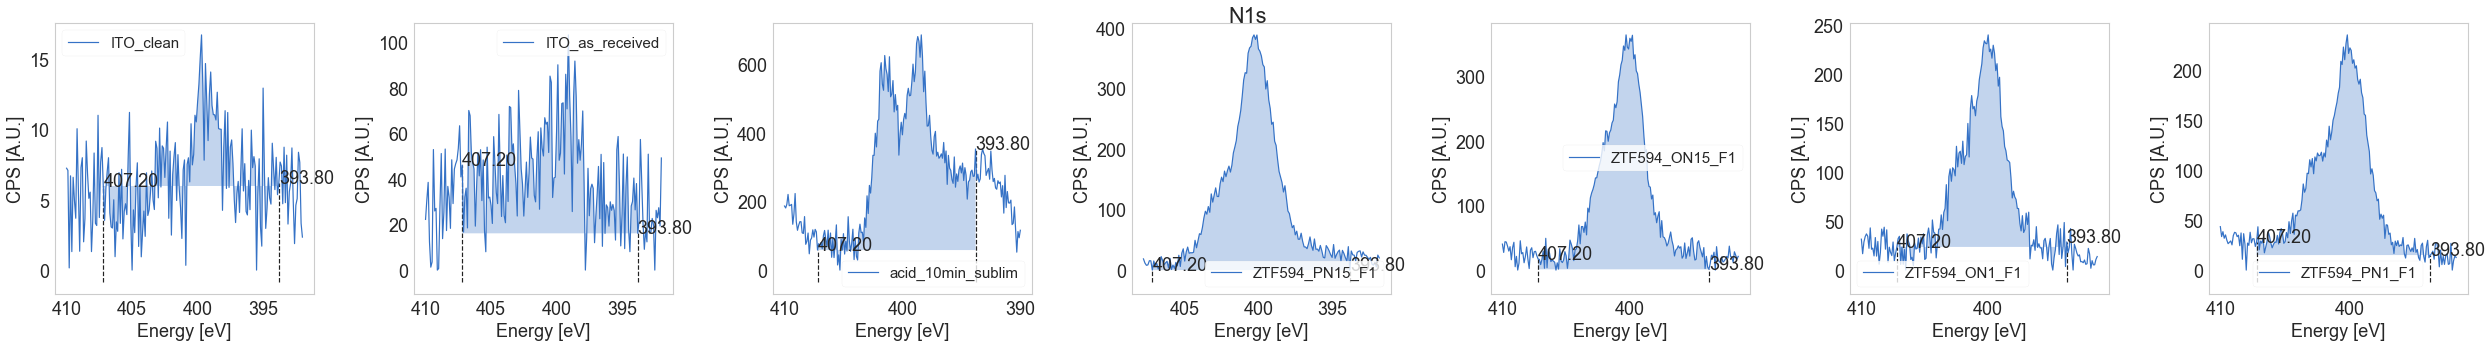

In [17]:
region = 'N1s'
integrateRegions(sdeas, region, indRef=3, asf=asf)

### Br 3p

[492.8755389577586, 476.6344701813183, 478.1736118371971, 320.20949021728103]

<Figure size 460.8x403.2 with 0 Axes>

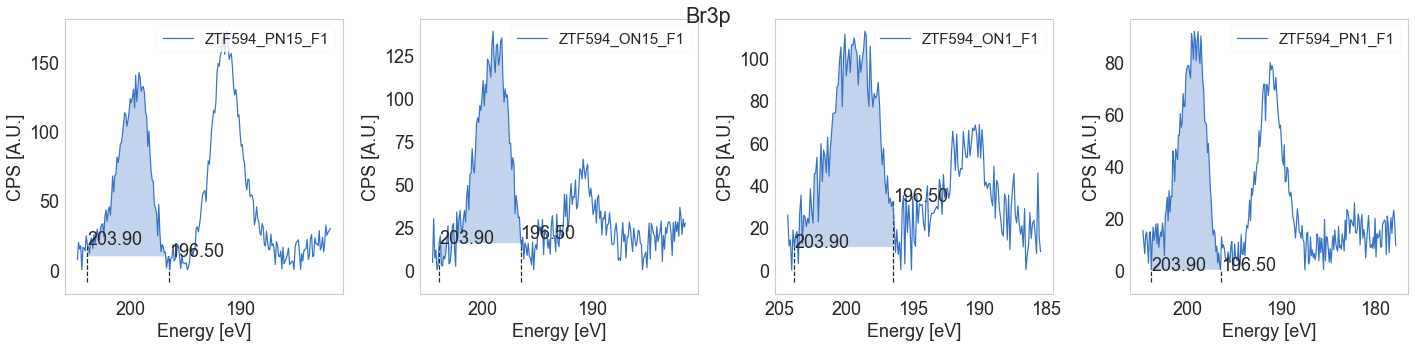

In [18]:
region = 'Br3p'
integrateRegions(sdeas[3:], region, indRef=3, asf=asf)

### Si 2p

[470.217665889204, 693.7757307225976]

<Figure size 460.8x403.2 with 0 Axes>

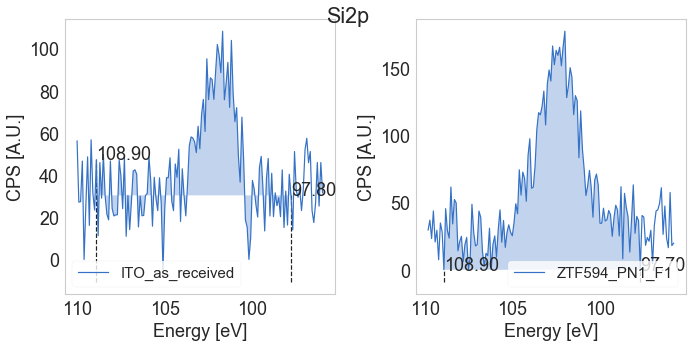

In [37]:
region = 'Si2p'
integrateRegions([sdeas[1], sdeas[6]], region, indRef=1, asf=asf)

In [44]:
sdeas[6].area['Si2p'] -= sdeas[1].area['Si2p']

## Stoichiometry

In [116]:
num, denom = (('C1s', 'C1s', 'N1s'), ('O1s', 'N1s', 'Si2p'))
make_stoichometry_table(sdeas[2:],  num=num, denom=denom)

Experiment	C/O	C/N	N/Si	
ZTF594_PN15_F1	0.55	 9.18	 inf	 
ZTF594_ON15_F1	0.54	 6.94	 inf	 
ZTF594_ON1_F1	0.55	 9.15	 inf	 
ZTF594_PN1_F1	0.34	 5.76	 3.62	 


/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:559: RuntimeWarning: divide by zero encountered in double_scalars
  row += ('%.2f\t ' %(xp.area[i]/xp.area[j]))


In [40]:
sdeas[6].area

{'C1s': 13842.365091973483,
 'O1s': 28519.40243145774,
 'N1s': 2292.549381836999,
 'Br3p': 303.80407041487763,
 'Si2p': 2046.5360788277214}

In [35]:
num, denom = (('C1s', 'N1s','O1s', 'O1s', 'O1s', 'C1s'), ('N1s', 'Si2p', 'C1s', 'N1s', 'Si2p', 'Si2p'))
make_stoichometry_table([sdeas[1], sdeas[-1]],  num=num, denom=denom)

Experiment	C/N	N/Si	O/C	O/N	O/Si	C/Si	
ITO_as_received	6.74	 0.87	 5.09	 34.28	 29.91	 5.88	 
ZTF594_PN1_F1	6.04	 1.12	 2.06	 12.44	 13.94	 6.76	 


In [51]:
sdeas[6].area

{'C1s': 13842.365091973483,
 'O1s': 28549.269686324216,
 'N1s': 2292.549381836999,
 'Br3p': 303.80407041487763,
 'Si2p': 659.4633180926064}

In [105]:
print('Nominal')
print('C/O \t C/N \t N/Si')
print('%.3f'%(17/4), '\t', '%.3f'%(17/3), '\t %.3f' %(3/1) )

Nominal
C/O 	 C/N 	 N/Si
4.250 	 5.667 	 3.000


### Corrected for O 1s from ITO

In [65]:
4/3

1.3333333333333333

In [64]:
num, denom = (('C1s', 'C1s', 'O1s', 'N1s', 'O1s'), ('O1s', 'N1s', 'N1s', 'Si2p', 'Si2p'))
make_stoichometry_table([sdeas[1], sdeas[6]],  num=num, denom=denom)

Experiment	C/O	C/N	O/N	N/Si	O/Si	
ITO_as_received	0.20	 6.74	 34.28	 0.87	 29.91	 
ZTF594_PN1_F1	2.23	 6.04	 2.71	 3.48	 9.40	 


# APTES only

In [6]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/APTES/proc/*.xy'

files = glob.glob(path, recursive=True)
files.sort()

files_new = ['/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201106_ITO_as_received.xy']

for f in files:
        files_new.append(f)
files = files_new
files.pop(2)
files[2], files[3] = files[3], files[2]
files

['/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201106_ITO_as_received.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/APTES/proc/20201102_ITO_DEA_ZTF594_PA15.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/APTES/proc/20201104_ITO_DEA_ZTF594_OA15.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/APTES/proc/20201104_ITO_DEA_ZTF594_OA1.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/APTES/proc/20201105_ITO_DEA_ZTF594_PA1.xy']

In [7]:
proc_exps = []

colors = ['k', 'y', 'lime', 'b', 'r']# 'y', 'c', 'k', 'lime']
for f, c in zip(files, colors):
    ls = 'solid'
    if '_O' in f: ls = 'dashed'
    print(f)
# for f in files:
    proc_exps.append(read_processed_xp(f, color=c, ls=ls))

/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201106_ITO_as_received.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/APTES/proc/20201102_ITO_DEA_ZTF594_PA15.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/APTES/proc/20201104_ITO_DEA_ZTF594_OA15.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/APTES/proc/20201104_ITO_DEA_ZTF594_OA1.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/APTES/proc/20201105_ITO_DEA_ZTF594_PA1.xy


## Show individual plots

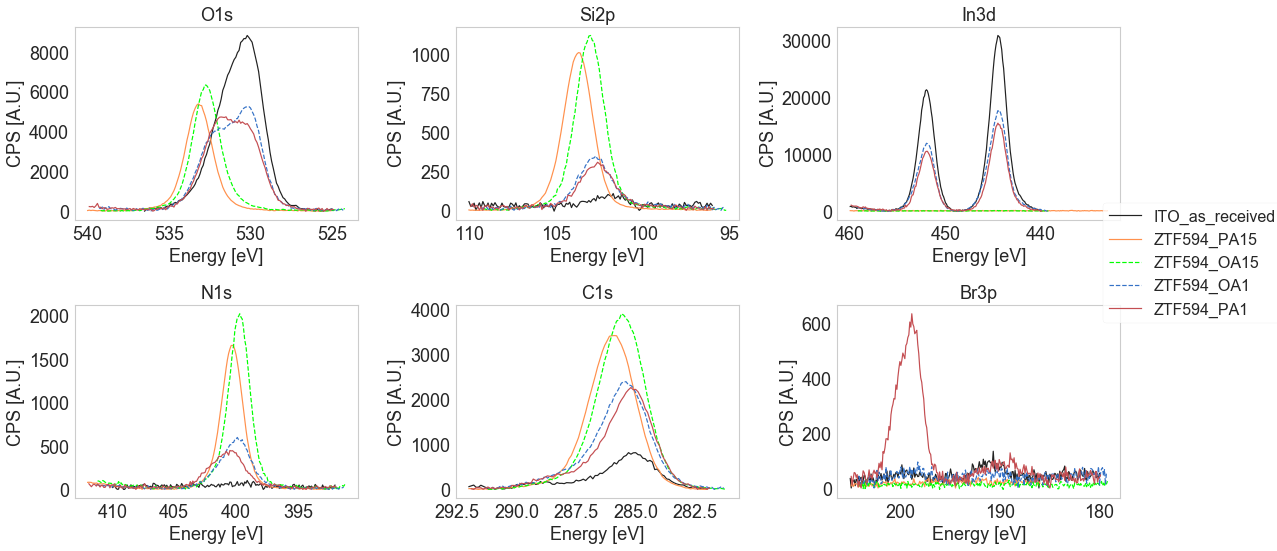

In [132]:
regions= ['O1s', 'Si2p', 'In3d', 'N1s', 'C1s', 'Br3p',]
plot_xp_regions(proc_exps, regions, ncols=3)

In [8]:
4.36/1.72

2.5348837209302326

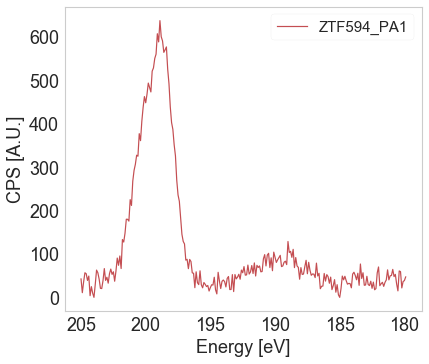

In [133]:
plot_region(proc_exps[4], 'Br3p')

Text(0.5, 1.0, 'In 3d')

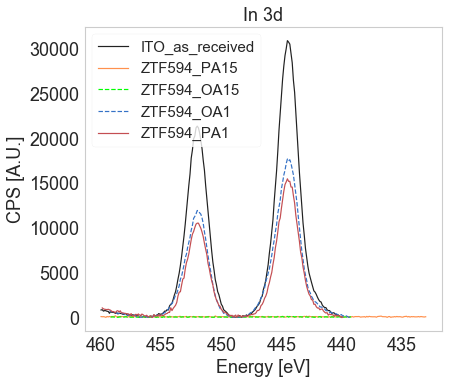

In [135]:
for xp in proc_exps:
    plot_region(xp, 'In3d')
plt.title('In 3d')

## Compare SDEA to APTES

In [172]:
[xp.name for xp in sdeas], [xp.name for xp in proc_exps]

(['ITO_as_received',
  'acid_10min_sublim',
  'ZTF594_PN15_F1',
  'ZTF594_ON15_F1',
  'ZTF594_ON1_F1',
  'ZTF594_PN1_F1'],
 ['ITO_as_received', 'ZTF594_PA15', 'ZTF594_OA15', 'ZTF594_OA1', 'ZTF594_PA1'])

In [179]:
regions= ['O1s', 'In3d', 'N1s', 'C1s']

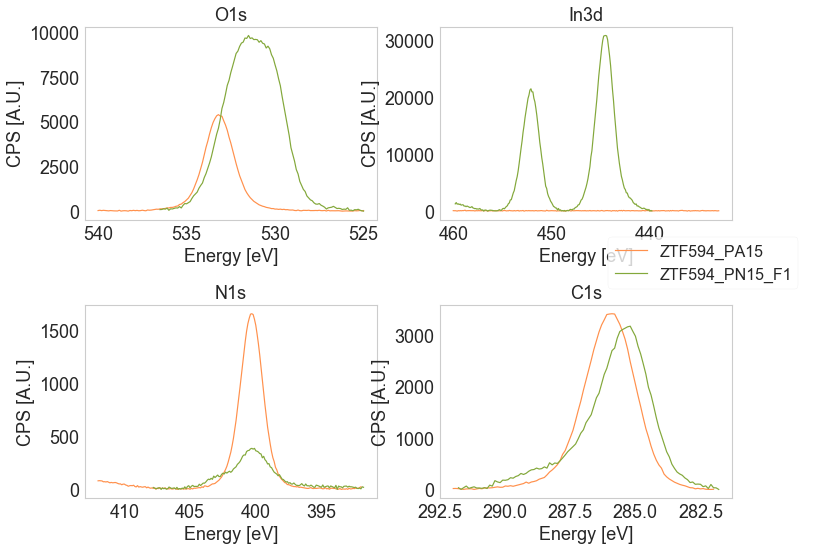

In [189]:
plot_xp_regions([proc_exps[1], sdeas[2]], regions, ncols=2)
plt.gcf().set_figwidth(10)

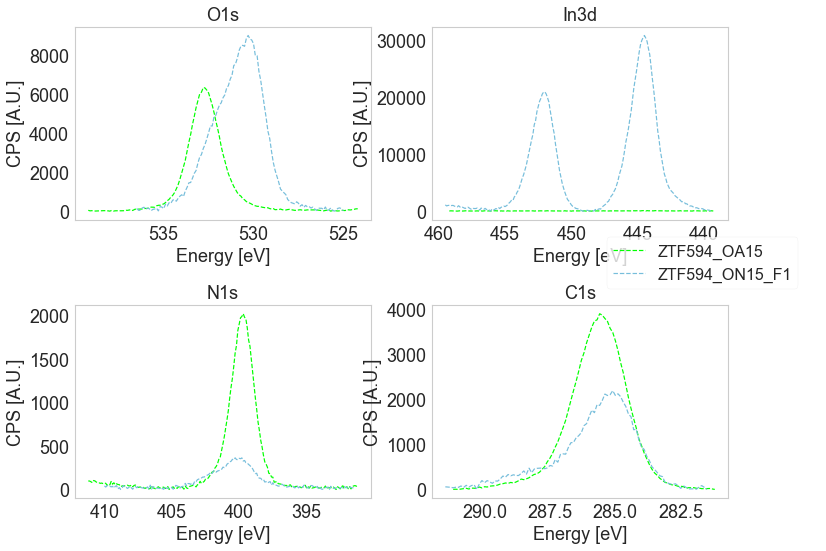

In [190]:
plot_xp_regions([proc_exps[2], sdeas[3]], regions, ncols=2)
plt.gcf().set_figwidth(10)

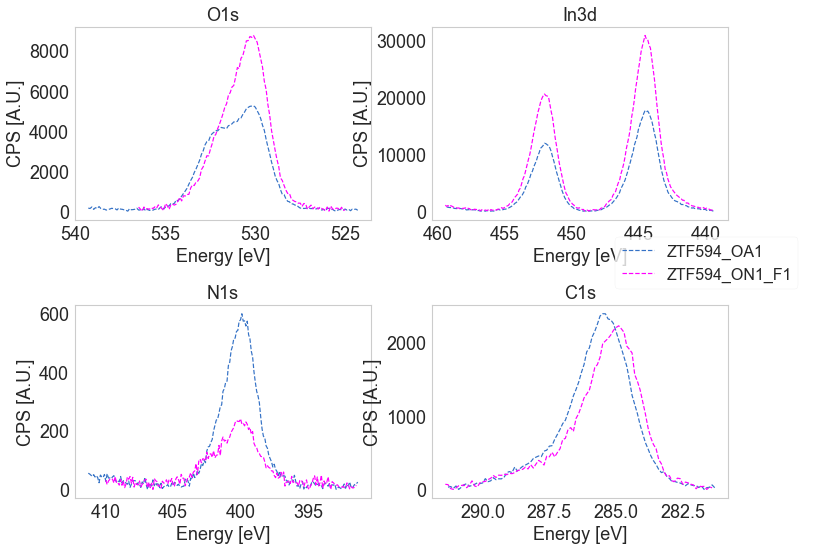

In [191]:
plot_xp_regions([proc_exps[3], sdeas[4]], regions, ncols=2)
plt.gcf().set_figwidth(10)

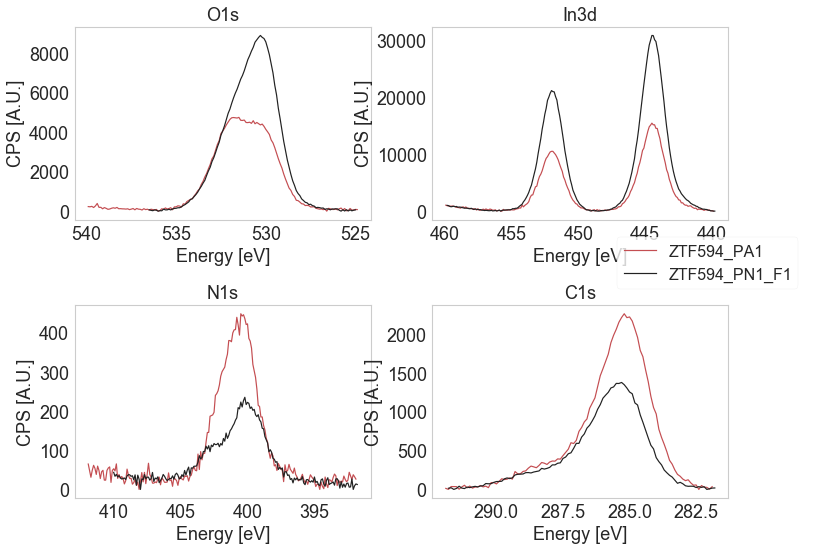

In [192]:
plot_xp_regions([proc_exps[4], sdeas[5]], regions, ncols=2)
plt.gcf().set_figwidth(10)

## Group by plasma/O3

In [357]:
ozexp, plexp = [], []
for xp in proc_exps:
    if '_O' in xp.name:
        ozexp.append(xp)
    else:
        plexp.append(xp)
[xp.name for xp in ozexp]

['ZTF594_ON15_F1', 'APTES_OA15']

In [360]:
regions= ['O1s', 'Si2p', 'In3d', 'N1s', 'C1s', 'Br3p',]

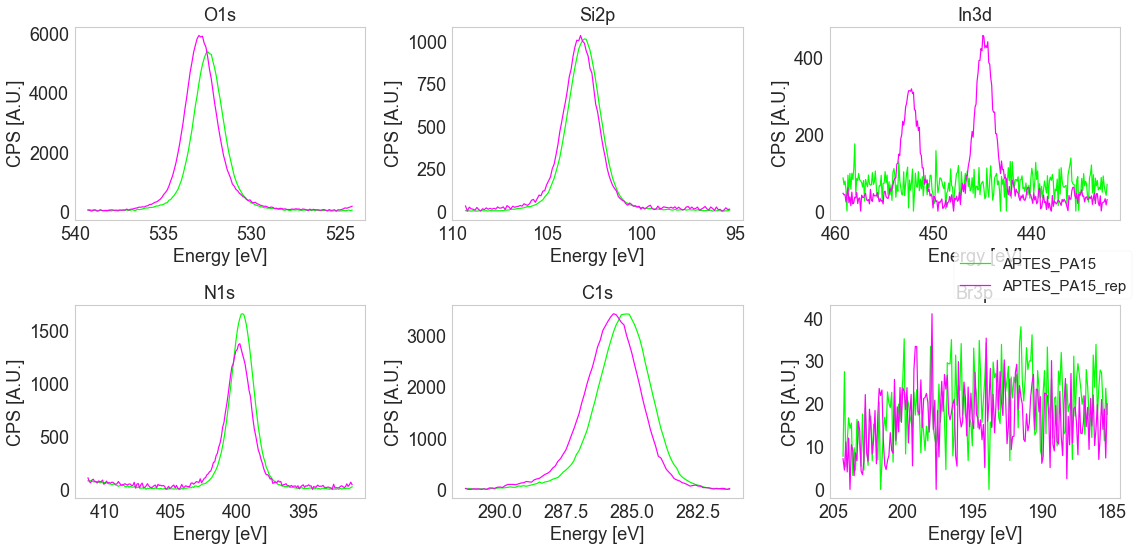

In [361]:
plot_xp_regions(plexp, regions, ncols=3)

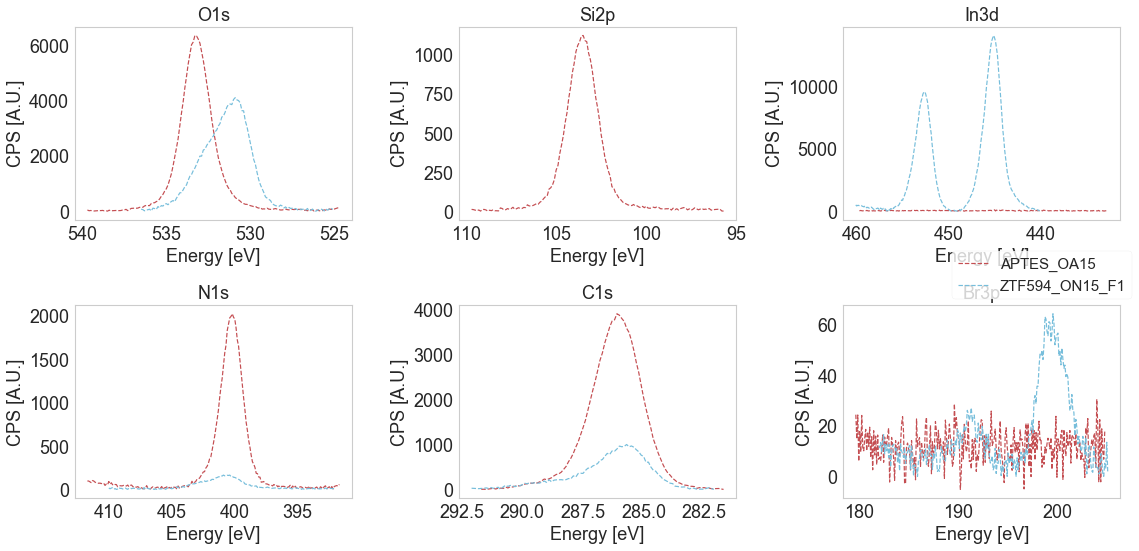

In [365]:
plot_xp_regions(ozexp[-1::-1], regions, ncols=3)

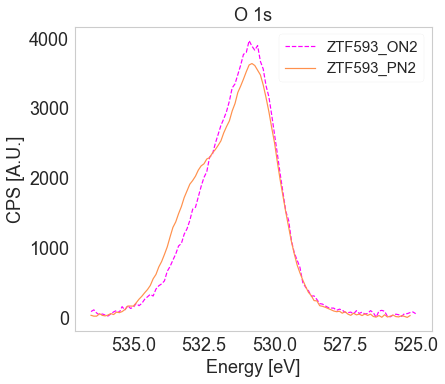

In [352]:
region = 'O1s'
plot_region(ozexp[0], region, lb=ozexp[0].name)
plot_region(plexp[3], region, lb=plexp[3].name)
cosmetics_plot()
plt.title('O 1s')

plt.gca().lines

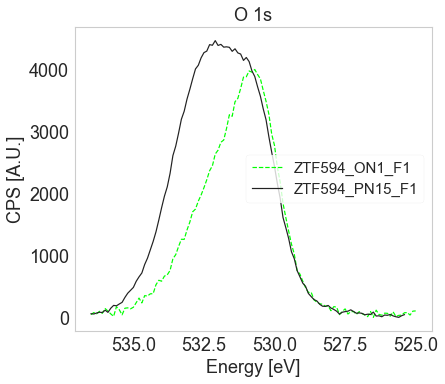

In [354]:
region = 'O1s'
plot_region(ozexp[2], region, lb=ozexp[2].name)
plot_region(plexp[4], region, lb=plexp[4].name)
cosmetics_plot()
plt.title('O 1s')

plt.gca().lines

## Integrate areas

In [136]:
for xp in proc_exps:
    xp.area = {}

### C 1s

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:61: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


[2417.733850285772,
 8545.504836983959,
 9805.05086154648,
 6710.254438977841,
 6190.45879101228]

<Figure size 460.8x403.2 with 0 Axes>

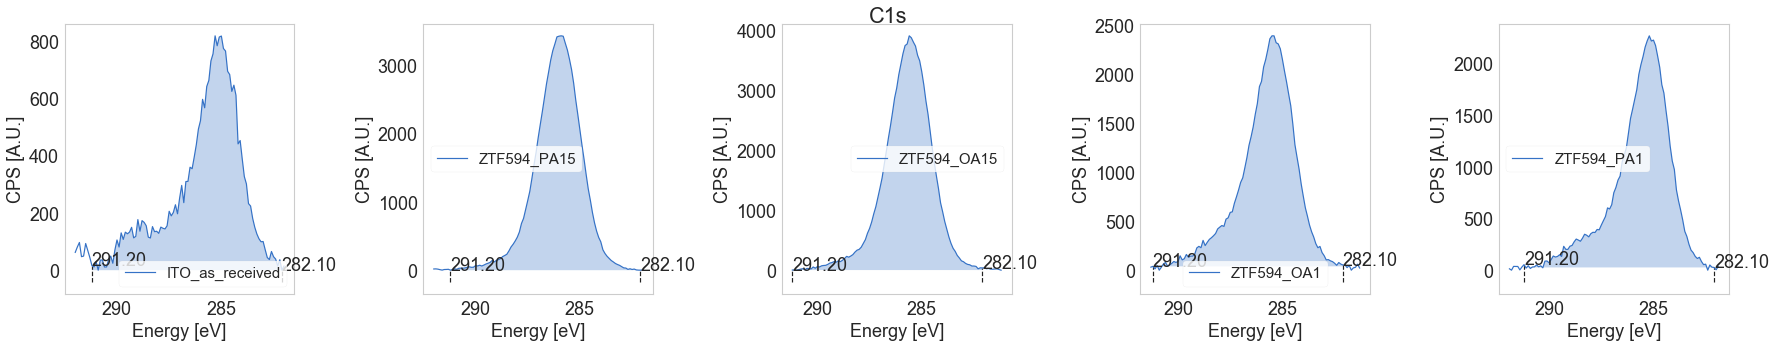

In [137]:
region = 'C1s'
integrateRegions(proc_exps, region, indRef=1, asf=asf)

### O 1s

[29488.343556170643,
 11955.558697041579,
 14379.45685602456,
 20608.52675647612,
 19534.500196108485]

<Figure size 460.8x403.2 with 0 Axes>

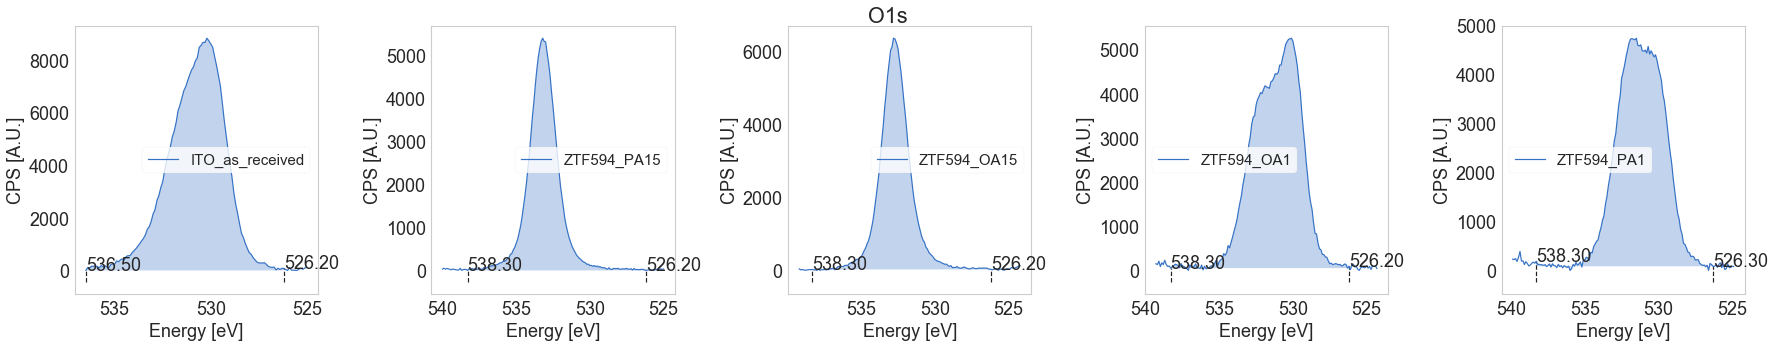

In [138]:
region = 'O1s'
integrateRegions(proc_exps, region, indRef=1, asf=asf)

### N 1s

[538.972939994032,
 3798.267840449674,
 4682.898310685879,
 1920.9436120373134,
 1698.2157015768857]

<Figure size 460.8x403.2 with 0 Axes>

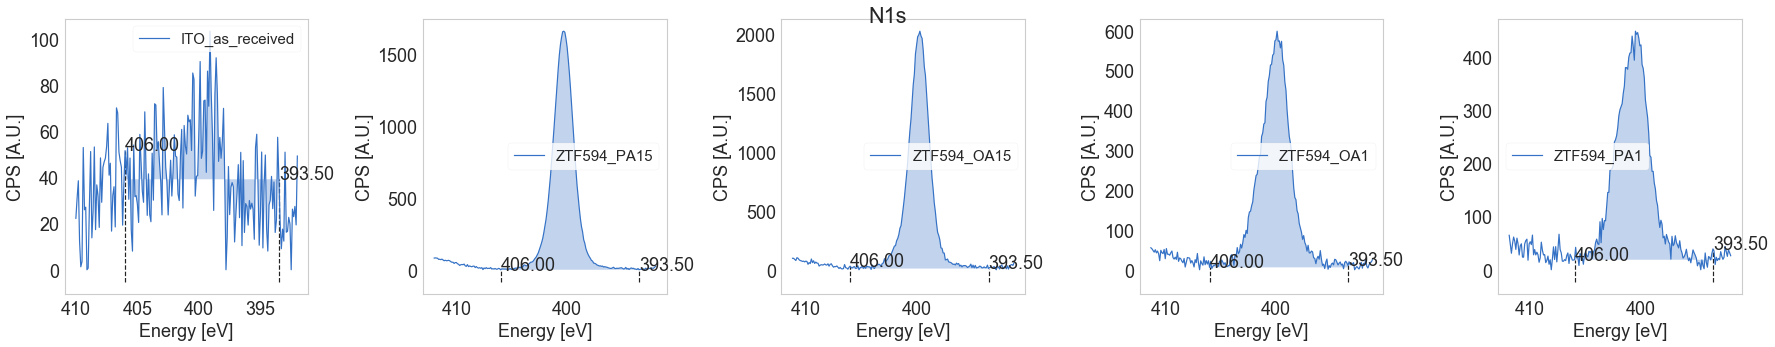

In [139]:
region = 'N1s'
integrateRegions(proc_exps, region, indRef=1, asf=asf)

### Br 3p

[903.5549217698626,
 366.2319151952274,
 219.78677536849807,
 758.9000079953796,
 2621.8487389872694]

<Figure size 460.8x403.2 with 0 Axes>

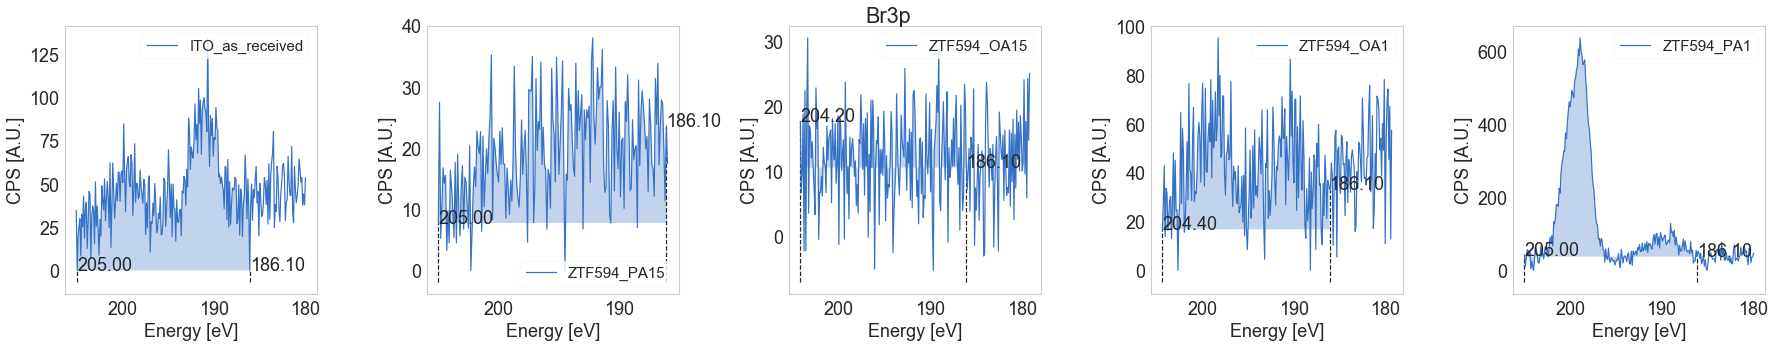

In [140]:
region = 'Br3p'
integrateRegions(proc_exps, region, indRef=0, asf=asf)

### In 3d

[116589.99525673405,
 1179.0261971074644,
 690.9228801947004,
 71523.4652027021,
 60039.810660138784]

<Figure size 460.8x403.2 with 0 Axes>

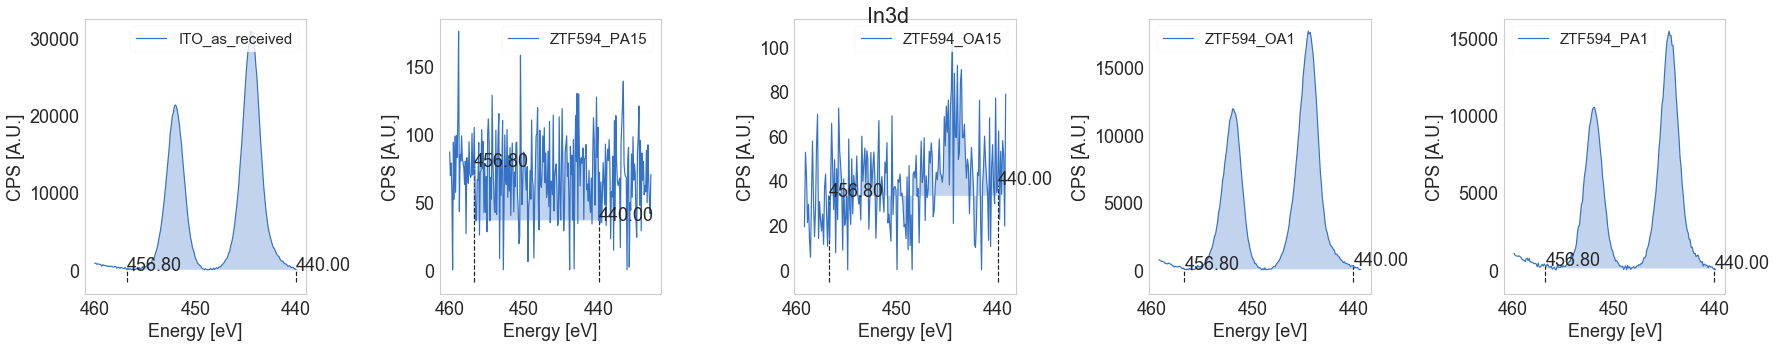

In [141]:
region = 'In3d'
integrateRegions(proc_exps, region, indRef=0, asf=asf)

### Sn 3d

[14716.869905506335,
 1072.504534136438,
 1577.4349562029934,
 10357.603624217245,
 8042.813788873707]

<Figure size 460.8x403.2 with 0 Axes>

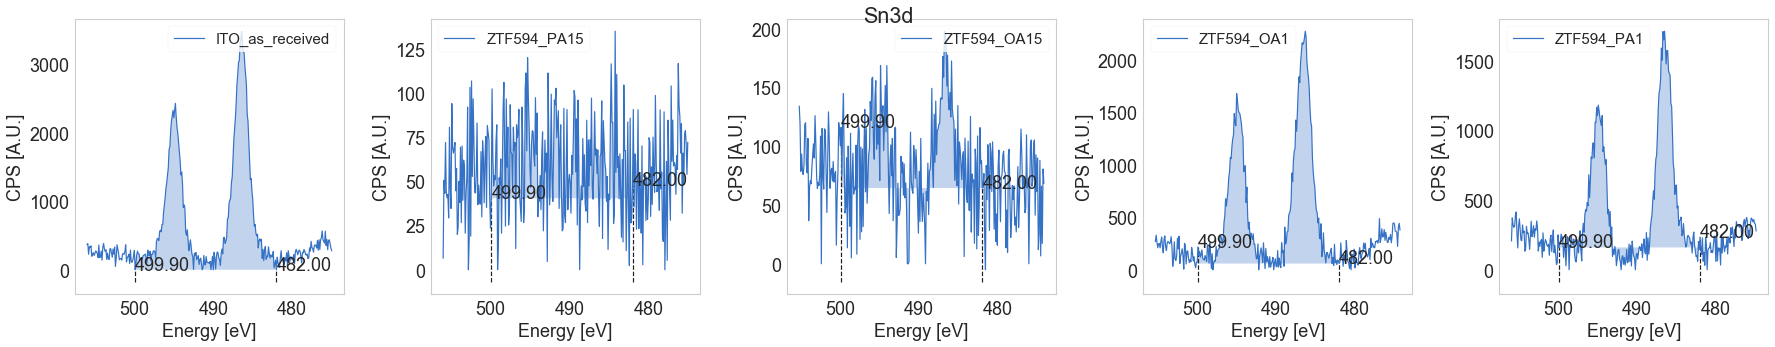

In [142]:
region = 'Sn3d'
integrateRegions(proc_exps, region, indRef=0, asf=asf)

### Si 2p

[544.4481162924237,
 2242.294052880232,
 2502.437481392229,
 1022.7384301094626,
 939.107422336436]

<Figure size 460.8x403.2 with 0 Axes>

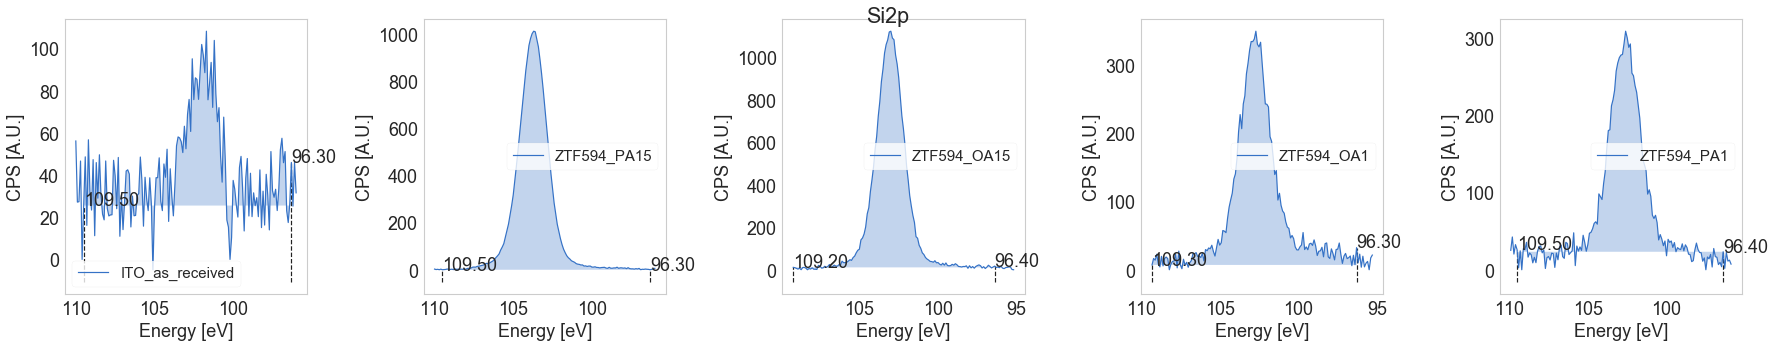

In [151]:
region = 'Si2p'
integrateRegions(proc_exps, region, indRef=1, asf=asf, flag_fill=True)

## Stoichiometry

In [152]:
num, denom = (('C1s', 'C1s', 'N1s', 'C1s', 'O1s'), ('O1s', 'N1s', 'Si2p', 'Si2p', 'N1s'))
make_stoichometry_table(proc_exps[1:],  num=num, denom=denom)

Experiment	C/O	C/N	N/Si	C/Si	O/N	
ZTF594_PA15	1.72	 3.63	 1.20	 4.36	 2.11	 
ZTF594_OA15	1.64	 3.37	 1.33	 4.49	 2.06	 
ZTF594_OA1	0.78	 5.63	 1.33	 7.51	 7.20	 
ZTF594_PA1	0.76	 5.87	 1.29	 7.55	 7.72	 


In [196]:
print('Nominal')
print('C/O \t C/N \t N/Si \t C/Si \t O/N')
print(3/3, '\t', '%.3f'%(3/1), '\t', 1, '\t %.3f' %(3/1), '\t %.3f'%(3/1) )

Nominal
C/O 	 C/N 	 N/Si 	 C/Si 	 O/N
1.0 	 3.000 	 1 	 3.000 	 3.000


# DEA powder (BD563, BD572)

In [13]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201117*.xy'

files = glob.glob(path, recursive=True)
files.sort()

files_new = []

for f in files:
        files_new.append(f)
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201117_powder_DEA_BD563.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/proc/20201117_powder_DEA_BD572.xy']

In [19]:
powders = []

colors = ['r', 'b', 'lime']
for f, c in zip(files, colors):
    ls = 'solid'
# for f in files:
    powders.append(read_processed_xp(f, color=c, ls=ls))

## Show individual plots

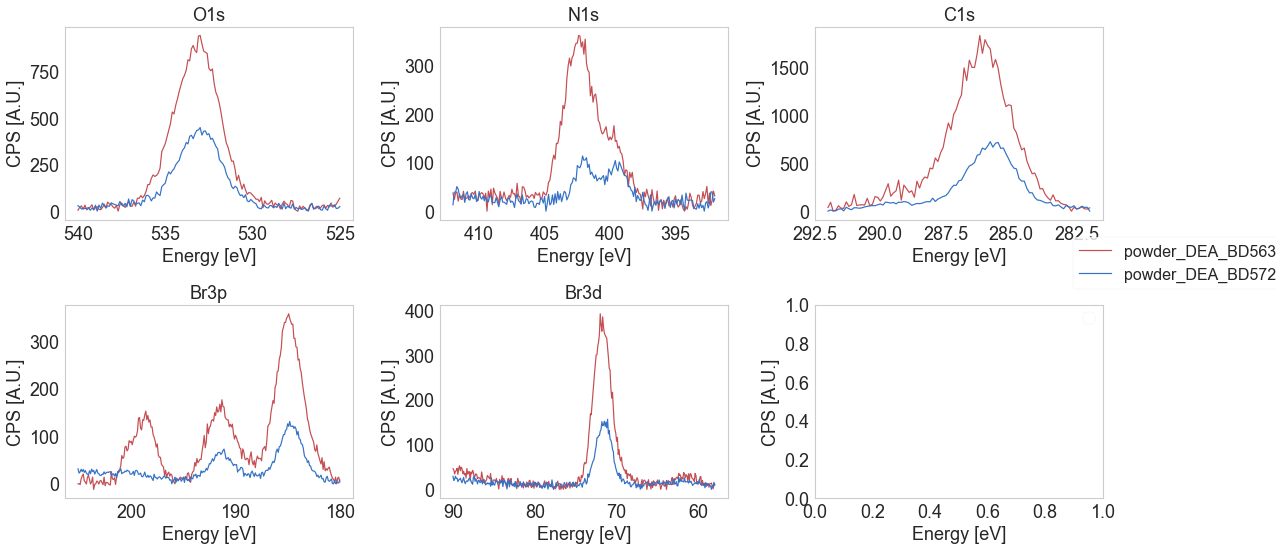

In [20]:
regions= ['O1s','N1s', 'C1s', 'Br3p', 'Br3d']
plot_xp_regions(powders, regions, ncols=3)

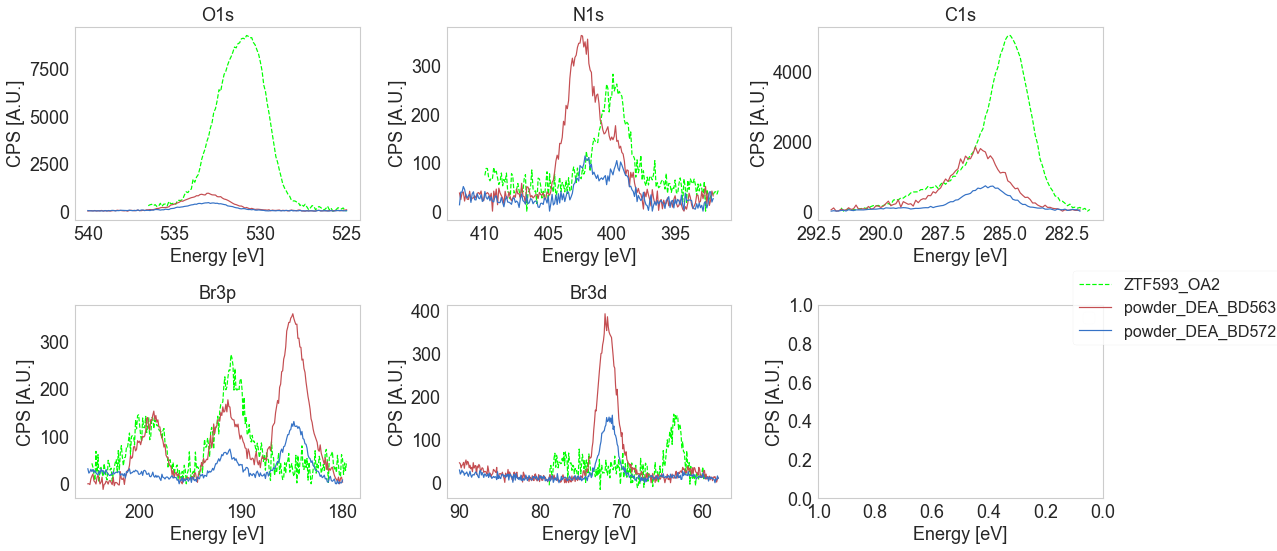

In [50]:
regions= ['O1s','N1s', 'C1s', 'Br3p', 'Br3d']
plot_xp_regions( [ddeas[8]] + powders, regions, ncols=3)

In [62]:
ddeas[2].color = 'g'

Text(0.5, 1.0, 'N1s')

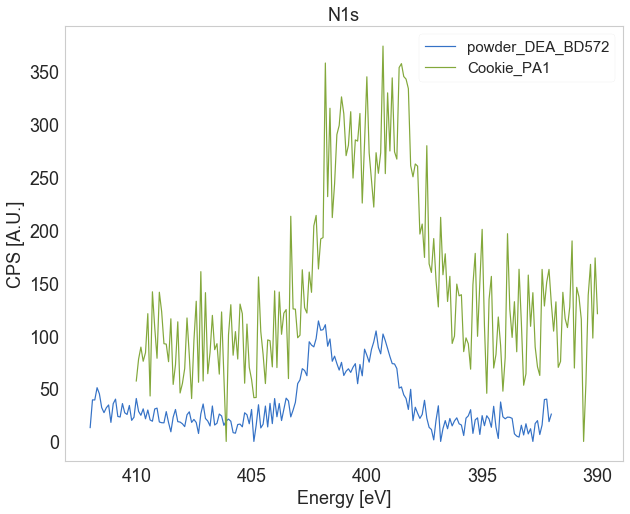

In [70]:
region = 'N1s'
plt.figure(figsize=(10,8))
plot_region(powders[1], 'N1s')
plot_region(ddeas[2], 'N1s')
cosmetics_plot()
plt.title(region)

Text(0.5, 1.0, 'N1s')

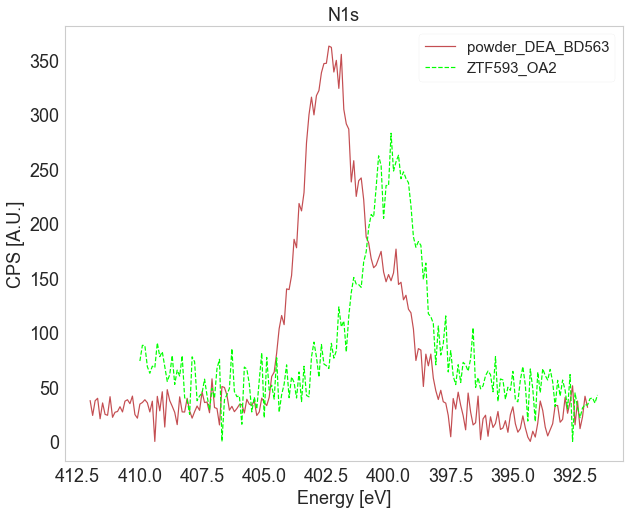

In [71]:
plt.figure(figsize=(10,8))
plot_region(powders[0], 'N1s')
plot_region(ddeas[8], 'N1s')
cosmetics_plot()
plt.title(region)

Text(0.5, 1.0, 'Br3p')

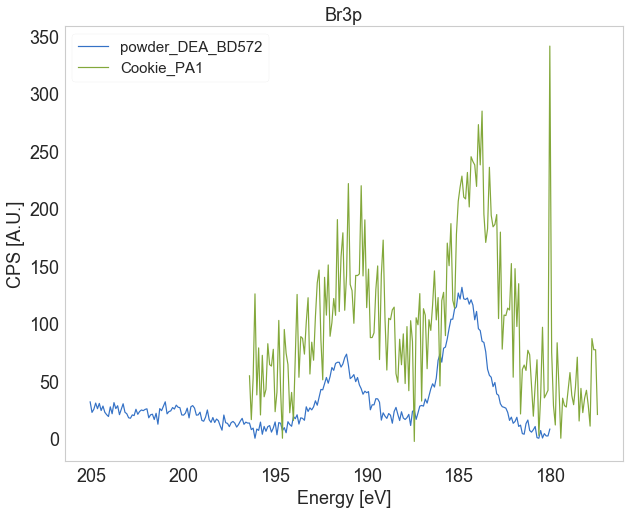

In [72]:
region = 'Br3p'
plt.figure(figsize=(10,8))
plot_region(powders[1], region)
plot_region(ddeas[2], region)
cosmetics_plot()
plt.title(region)

Text(0.5, 1.0, 'Br3p')

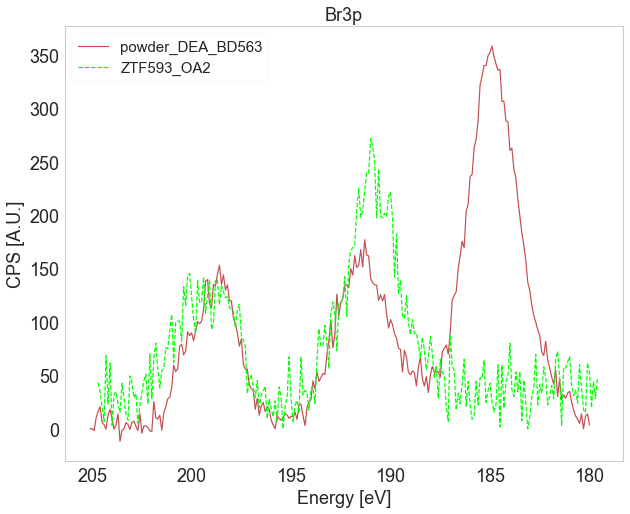

In [73]:
plt.figure(figsize=(10,8))
plot_region(powders[0], region)
plot_region(ddeas[8], region)
cosmetics_plot()
plt.title(region)

## Integrate areas

In [24]:
for xp in powders:
    xp.area = {}

### C 1s

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:64: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


[5141.355356923167, 1948.759494372683]

<Figure size 460.8x403.2 with 0 Axes>

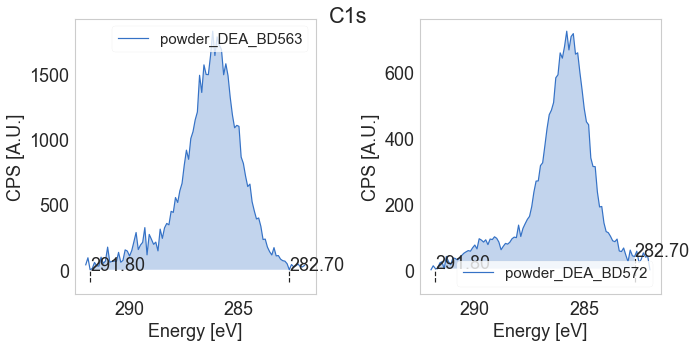

In [25]:
region = 'C1s'
integrateRegions(powders, region, indRef=0, asf=asf)

### O 1s

[3146.567146167736, 1597.316616774739]

<Figure size 460.8x403.2 with 0 Axes>

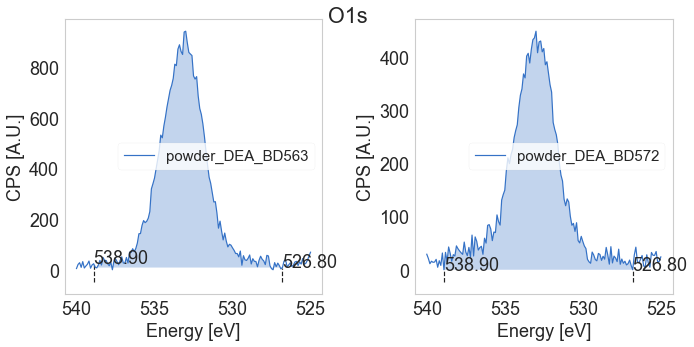

In [26]:
region = 'O1s'
integrateRegions(powders, region, indRef=1, asf=asf)

### N 1s

[1334.733610993605, 458.38318088582207]

<Figure size 460.8x403.2 with 0 Axes>

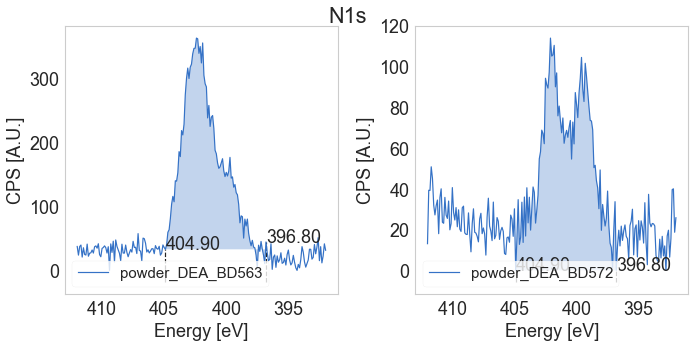

In [27]:
region = 'N1s'
integrateRegions(powders, region, indRef=1, asf=asf)

### Br 3p

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:64: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


[1784.723249402477, 630.4640393749166]

<Figure size 460.8x403.2 with 0 Axes>

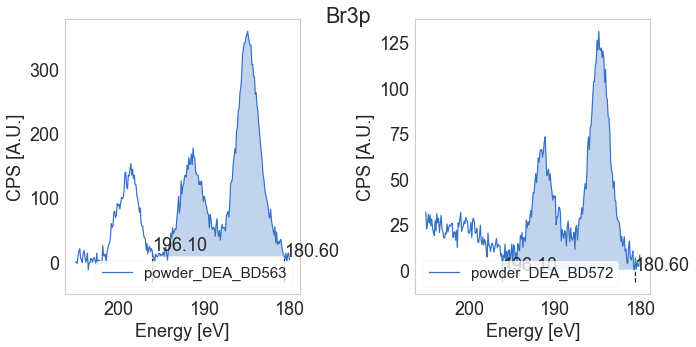

In [35]:
region = 'Br3p'
integrateRegions(powders, region, indRef=1, asf=asf)

### Br 3d

[1113.3333645793227, 443.10582698647056]

<Figure size 460.8x403.2 with 0 Axes>

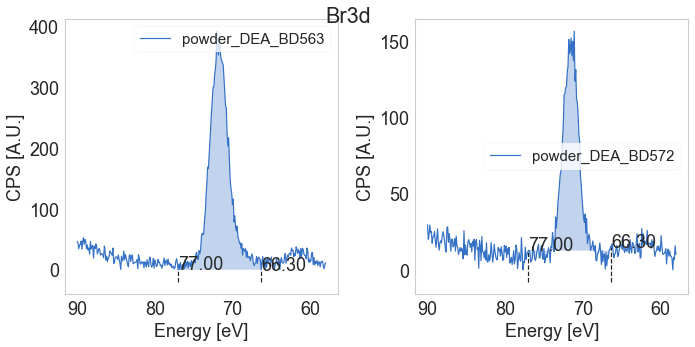

In [29]:
region = 'Br3d'
integrateRegions(powders, region, indRef=0, asf=asf)

## Stoichiometry

In [34]:
print('Nominal')
print('C/Br \t O/N \t N/Br \t O/Br')
print(14, '\t', '%.3f'%(2/2), '\t', 2, '\t %.3f' %2 )

Nominal
C/Br 	 O/N 	 N/Br 	 O/Br
14 	 1.000 	 2 	 2.000


In [33]:
num, denom = (('C1s', 'O1s', 'N1s', 'O1s'), ('Br3d', 'N1s', 'Br3d', 'Br3d'))
make_stoichometry_table(powders,  num=num, denom=denom)

Experiment	C/Br	O/N	N/Br	O/Br	
powder_DEA_BD563	16.44	 1.58	 2.65	 4.19	 
powder_DEA_BD572	15.66	 2.34	 2.29	 5.34	 


In [36]:
num, denom = (('C1s', 'O1s', 'N1s', 'O1s'), ('Br3p', 'N1s', 'Br3p', 'Br3p'))
make_stoichometry_table(powders,  num=num, denom=denom)

Experiment	C/Br	O/N	N/Br	O/Br	
powder_DEA_BD563	10.26	 1.58	 1.65	 2.61	 
powder_DEA_BD572	11.01	 2.34	 1.61	 3.76	 
